# 필수 라이브러리 로딩

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

mpl.rc('font', family = 'malgun gothic')
mpl.rc('axes', unicode_minus=False)

sns.set_style('darkgrid')
plt.rc('figure', figsize=(10, 8))

warnings.filterwarnings('ignore')

# 2018년도 국내 프로야구 선수 연봉 예측

- 출처 : https://www.statiz.co.kr

## 데이터 불러오기

In [3]:
picher = pd.read_csv('C:/k_digital/source/data/picher_stats_2017.csv')
batter = pd.read_csv('C:/k_digital/source/data/batter_stats_2017.csv')

## 탐색적 데이터 분석

In [4]:
picher.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   선수명       152 non-null    object 
 1   팀명        152 non-null    object 
 2   승         152 non-null    int64  
 3   패         152 non-null    int64  
 4   세         152 non-null    int64  
 5   홀드        152 non-null    int64  
 6   블론        152 non-null    int64  
 7   경기        152 non-null    int64  
 8   선발        152 non-null    int64  
 9   이닝        152 non-null    float64
 10  삼진/9      152 non-null    float64
 11  볼넷/9      152 non-null    float64
 12  홈런/9      152 non-null    float64
 13  BABIP     152 non-null    float64
 14  LOB%      152 non-null    float64
 15  ERA       152 non-null    float64
 16  RA9-WAR   152 non-null    float64
 17  FIP       152 non-null    float64
 18  kFIP      152 non-null    float64
 19  WAR       152 non-null    float64
 20  연봉(2018)  152 non-null    int64 

연봉(2018)  152 non-null    int64   -> 타깃으로 잡을것

In [5]:
picher.head()
# 전처리할게 있는지 확인
# 숫자들사이에 크기차이가 많이 남

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


In [6]:
picher.shape

(152, 22)

In [7]:
picher['연봉(2018)'].describe()
# 기초통계량을 확인
# 단위는 만원
# max값이 매우 높아서 야구선수 연봉의 편견이 생긴게 아닌가..

count       152.000000
mean      18932.236842
std       30940.732924
min        2700.000000
25%        4000.000000
50%        7550.000000
75%       18500.000000
max      230000.000000
Name: 연봉(2018), dtype: float64

<AxesSubplot:>

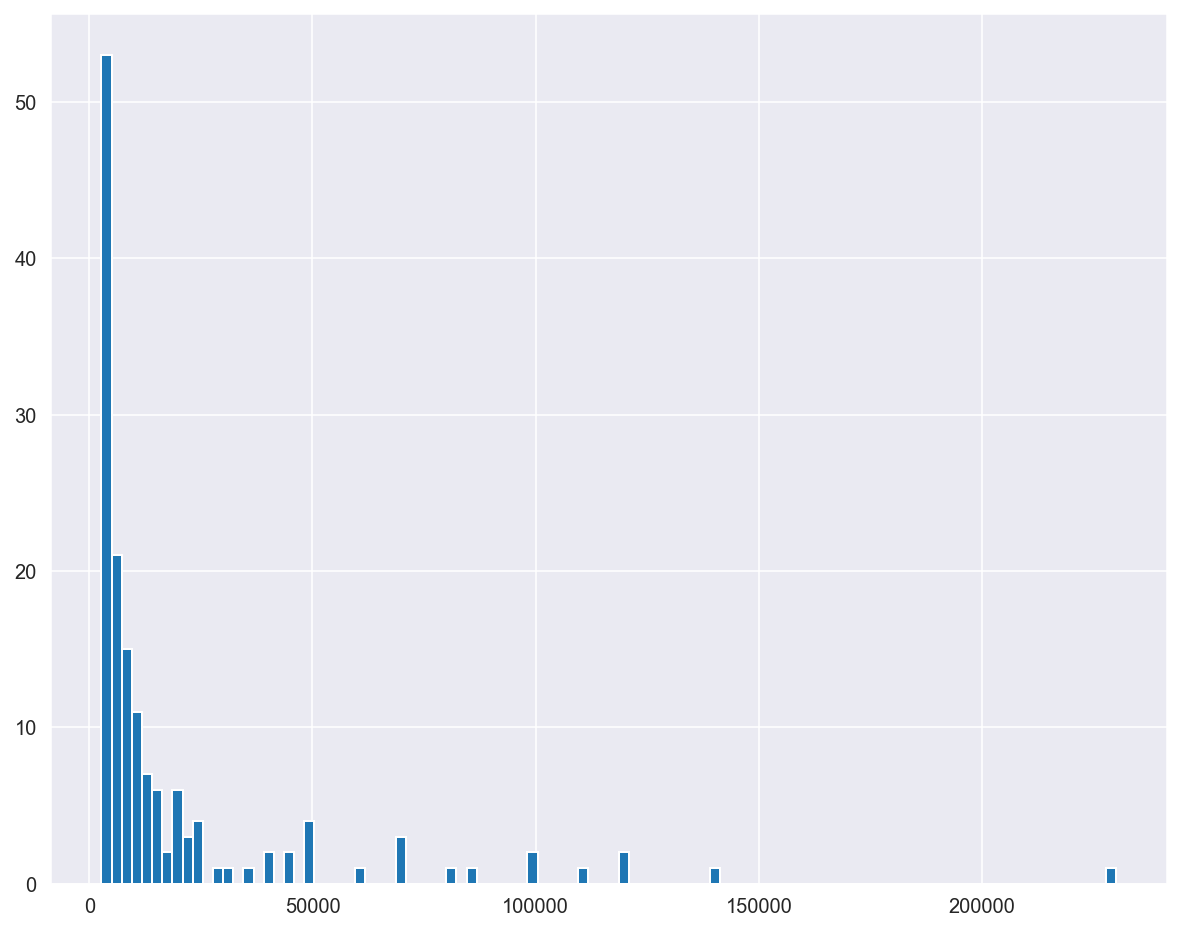

In [8]:
picher['연봉(2018)'].hist(bins=100)
# 이렇게 쓰는 스타일은 판다스를 이용한 시각화
# 이상치가 보임

<AxesSubplot:>

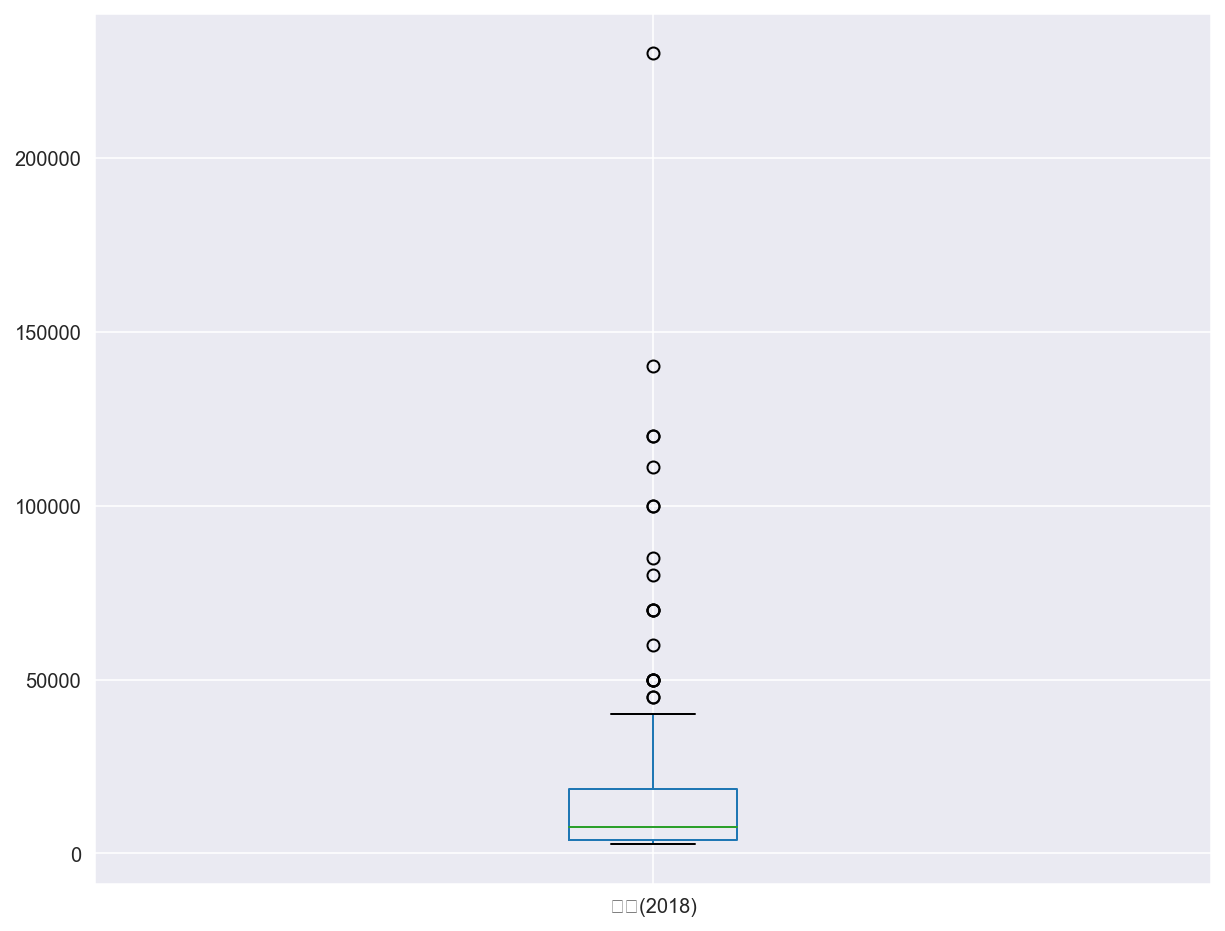

In [9]:
picher.boxplot(column=['연봉(2018)'])
# 박스플롯으로도 확인
# 문제와 정답이 있는 지도학습 중

## 회귀 분석에 사용할 피처 탐색

In [10]:
picher.columns
# 전체 컬럼중에 '선수명', '팀명'만 빼고 다 가져오고 싶음

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

In [11]:
# 차집합
# df.difference(['', '', ''])

pitcher_df = picher.columns.difference(['선수명', '팀명'])
- 이렇게만 읽어오면 인덱스를 반환해줌
- 근데 이래가지고 다시 인덱스를 데이터프레임으로.. 너무 복잡하니까
- 드롭으로 하는게 더 빠를것같음

In [12]:
picher_df = picher.drop(['선수명','팀명'], axis=1)
len(picher_df.columns)

20

In [13]:
picher_df.head()

,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,16,7,0,0,0,30,30,190.0,8.95,2.13,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,11,11,1,0,0,30,29,185.1,7.43,1.85,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,20,6,0,0,0,31,31,193.1,7.36,2.09,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,10,7,0,0,0,28,28,175.2,8.04,1.95,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,13,7,0,0,0,30,30,187.1,7.49,2.11,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


In [14]:
# 스무개의 피처들의 분포를 각각 히스토그램화
# 하나의 도화지에 스무개의 그림을 다 넣고싶다

In [15]:
# 각 feature들에 대한 분포를 시각화하는 작업

def plot_hist(df):
    plt.rcParams['figure.figsize'] = [20, 16]
    fig = plt.figure()
    # 도화지 생성하는거 ()안에 figsize넣는데 위에 써놔서안써도 됨
    # 굳이 뭘 쓰고싶으면 1(도화지한장)
    
    for i in range(len(df.columns)):
        # df의 컬럼 숫자만큼 반복0~20 해서 i라는 변수가 받음
        ax = fig.add_subplot(5, 5, i+1)
        # i의 시작값이 0이기 때문에 figsize엔 1을 더해줌
        plt.hist(df[df.columns[i]], bins=50)
        ax.set_title(df.columns[i])
        # 이름에는 컬럼이름이 들어가게 하고싶음
        
    plt.show() 

In [16]:
# plt.hist(df[df.columns[i]], bins=50) 
# 여기서 df[]로 감싸야 인덱스의 찐 내용을 가져오는거 주의

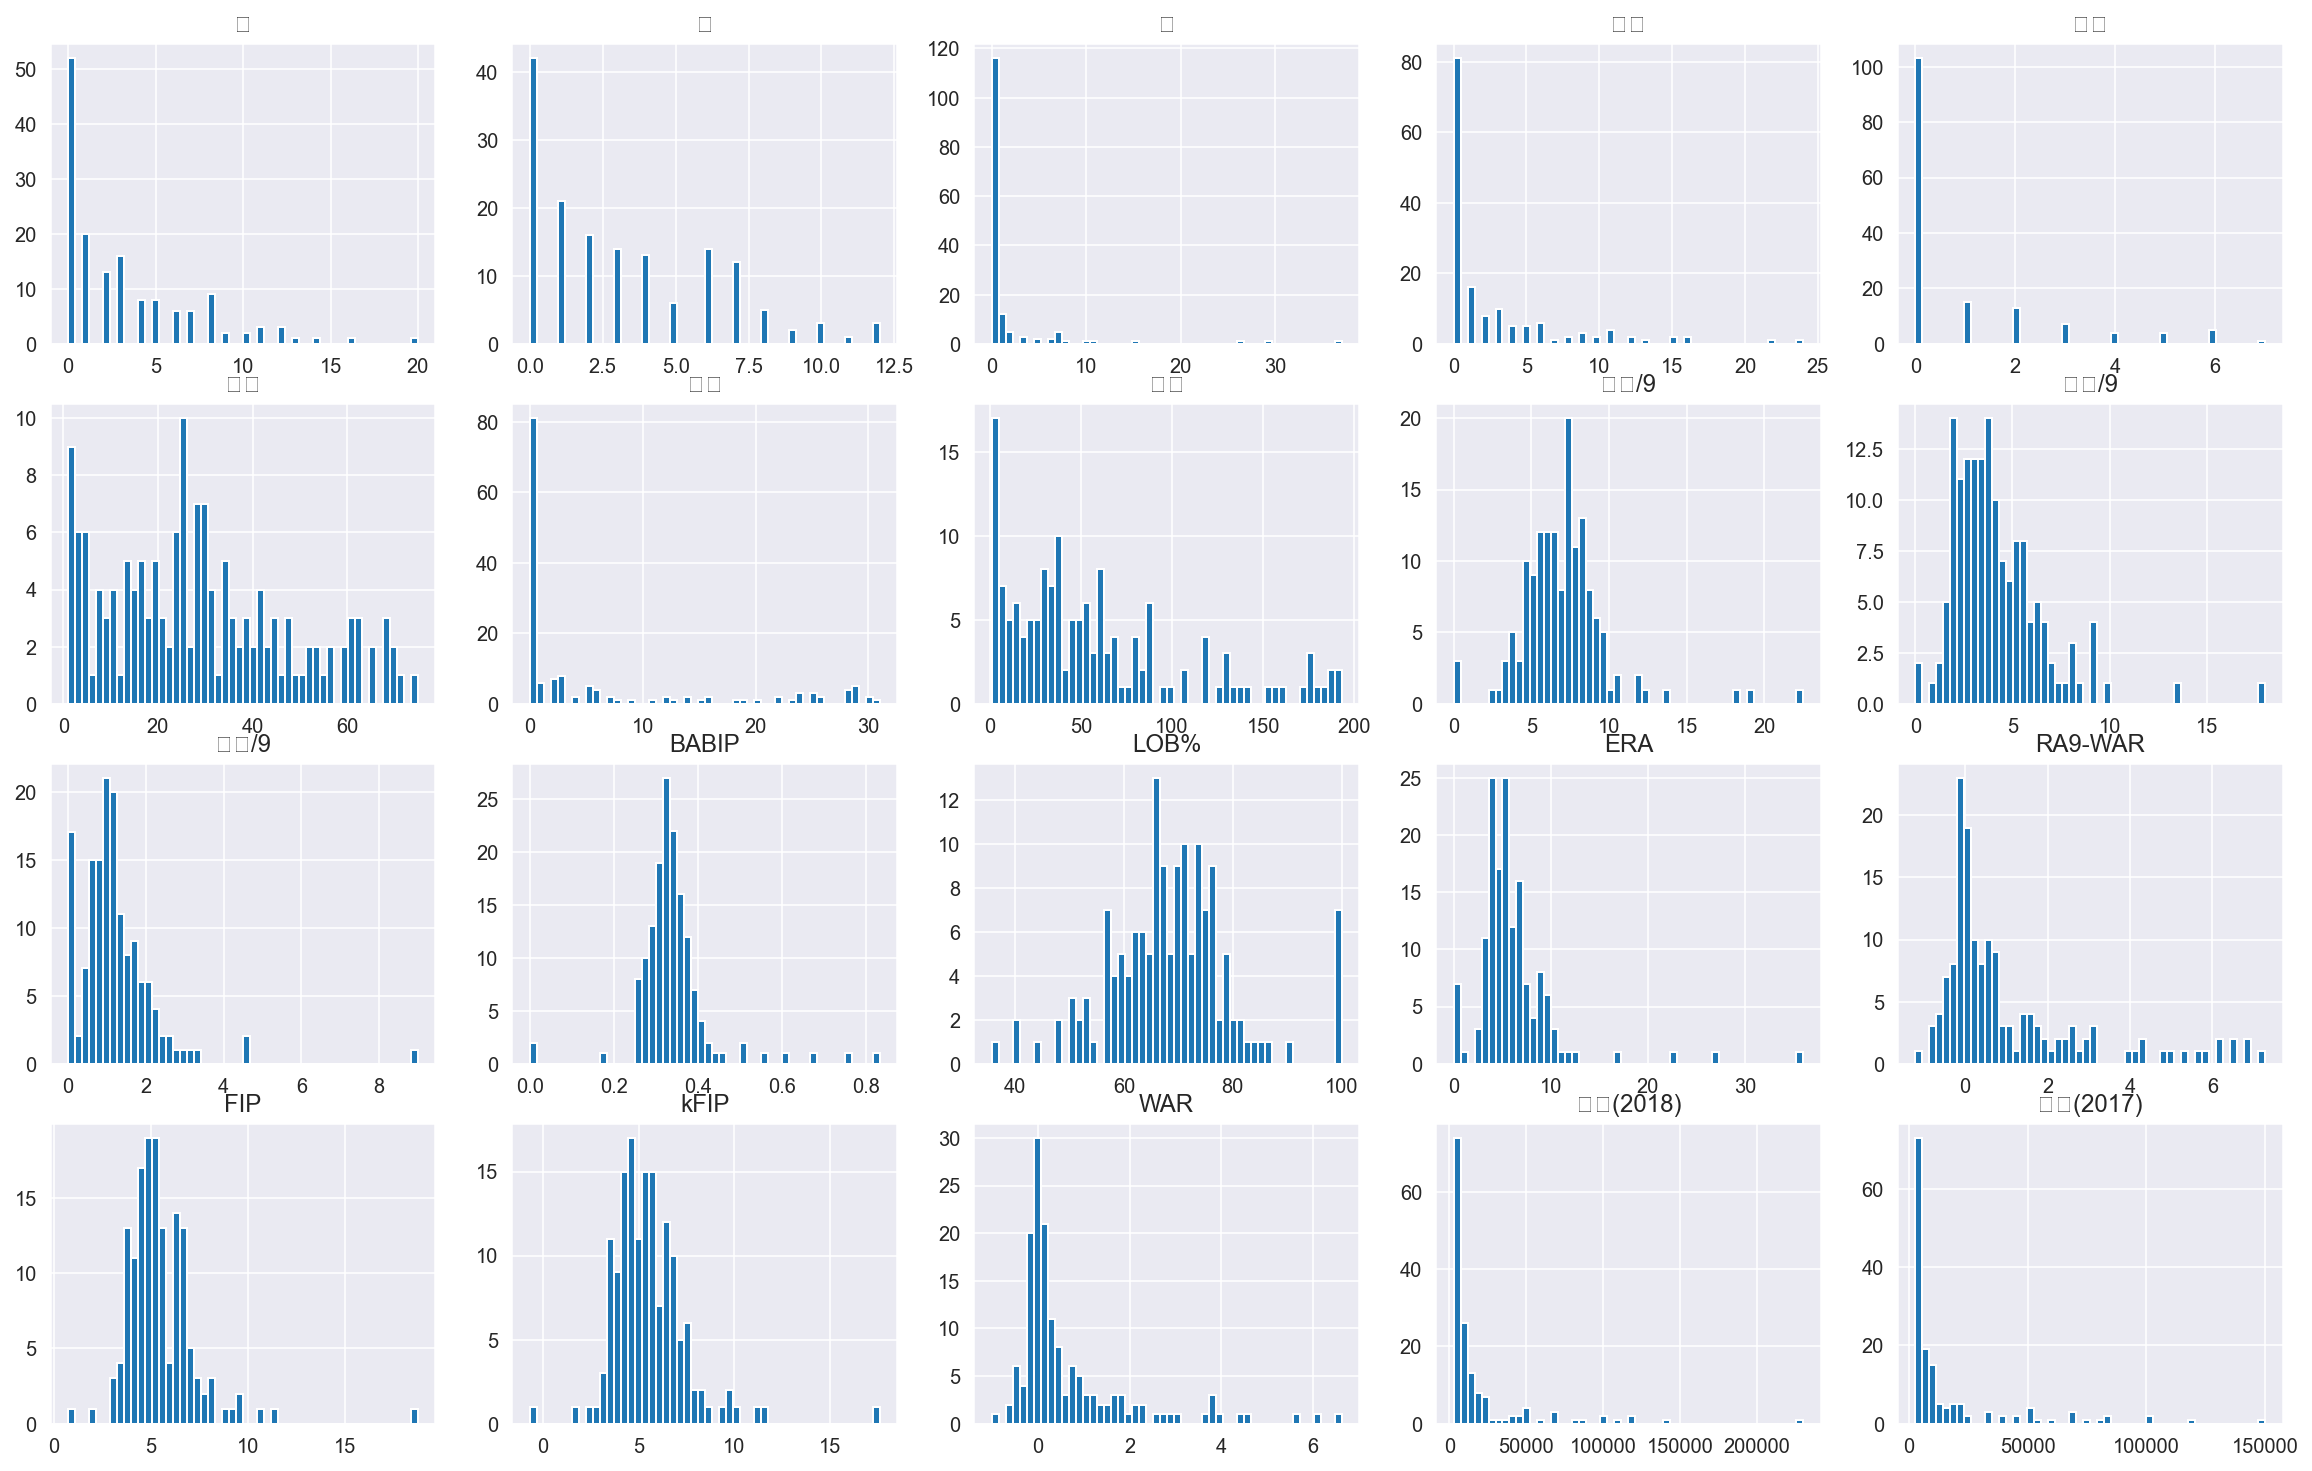

In [17]:
# 함수 호출
plot_hist(picher_df)
# x축을 보면 스케일을 할 필요가 있음

In [18]:
# 히트맵으로 상관분석
# 다중공선성이 있는지도 봐야할것같고
# 스무개의 컬럼에 피처 스케일링을 할거임
# 필요에 의해 함수를 만들것

## 전처리 : 피처 스케일링

- 피처 스케일링 : 피처들간의 단위를 맞추는 작업
- StandardScaler : 표준화(평균 = 0, 표준편차 = 1이 되게 맞추는것)
- 즉, 0에서 1사이의 값으로 단위를 맞추는 작업

In [19]:
def standard_scailing(df, scale_columns):
    
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x : (x-series_mean)/series_std)
        # 행 또는 열에(df[col]에) 반복적으로 처리할때 apply함수
        # 쓸때 익명의 함수를 만들어서 씀 lambda!
        # (x-series_mean)/series_std라는 공식을 lambda에 담음
        
    return df
# 마지막으로 이 작업을 df에 반환해줌

data = train[train.columns.difference(['release_time', 'box_off_num'])]
data

In [20]:
# 회귀분석: 독립변수와 종속변수를 분리하는 작업
# 종속변수: 연봉(2018)
# 독립변수를 사용할 feature들을 리스트로 저장장
scale_columns=['승','패','세','홀드','블론','경기','선발','이닝','삼진/9','볼넷/9','홈런/9','BABIP','LOB%','ERA','RA9-WAR',
                           'FIP','kFIP','WAR','연봉(2017)']
picher_df=standard_scailing(picher, scale_columns)
picher_df=picher_df.rename(columns={'연봉(2018)':'y'})
picher_df.head(5)

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,y,연봉(2017)
0,켈리,SK,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,...,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,140000,2.734705
1,소사,LG,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,...,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,120000,1.337303
2,양현종,KIA,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,...,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,230000,5.329881
3,차우찬,LG,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,...,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,100000,3.333592
4,레일리,롯데,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,...,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,111000,2.734705


In [21]:
picher_df = picher_df.rename(columns={'연봉(2018"':'y'})
picher_df

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,y,연봉(2017)
0,켈리,SK,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,...,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,140000,2.734705
1,소사,LG,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,...,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,120000,1.337303
2,양현종,KIA,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,...,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,230000,5.329881
3,차우찬,LG,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,...,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,100000,3.333592
4,레일리,롯데,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,...,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,111000,2.734705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,장민재,한화,-0.309907,0.588357,-0.306452,-0.585705,0.680497,0.214300,-0.112010,0.104300,...,0.363854,0.162874,-1.002712,0.411349,-1.229537,0.375810,0.475992,-0.859111,7100,-0.335587
148,정용운,KIA,-0.051084,-0.369825,-0.306452,-0.585705,-0.543592,-0.198678,0.503369,0.042667,...,-0.147418,-0.871003,-0.269422,-0.030253,-0.361721,0.482702,0.622339,-0.874237,7500,-0.535215
149,노경은,롯데,-0.827554,-0.369825,-0.306452,-0.585705,-0.543592,-1.024633,-0.419699,-0.850019,...,1.219251,0.466294,-1.356417,1.347354,-1.023431,1.348527,1.389397,-0.964995,10000,-0.020173
150,김승현,삼성,-0.827554,-0.050431,-0.306452,-0.364245,-0.543592,0.627278,-0.624825,-0.273451,...,0.226204,0.005545,0.463869,-0.066253,-0.790205,0.728554,0.713175,-1.033063,4000,-0.543201


### 피처 스케일링 : 더미 or 원-핫 인코딩

- 문자 또는 범주형 데이터를 정형화된 데이터(0과1)로 변형하는 작업

In [22]:
team_encoding = pd.get_dummies(picher_df['팀명'])
# 기존의 팀명은 제거하고 우리가 새로만든 컬럼을 담아야 함
picher_df = picher_df.drop('팀명', axis=1)
picher_df = picher_df.join(team_encoding)

In [23]:
team_encoding.head()
# 확인

,KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0


In [24]:
picher_df.head()
# 데이터프레임에 잘합쳐졋는지도 확인

,선수명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,...,연봉(2017),KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,켈리,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,0.672099,...,2.734705,0,0,0,0,1,0,0,0,0
1,소사,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,0.134531,...,1.337303,0,0,1,0,0,0,0,0,0
2,양현종,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,0.109775,...,5.329881,1,0,0,0,0,0,0,0,0
3,차우찬,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,0.350266,...,3.333592,0,0,1,0,0,0,0,0,0
4,레일리,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,0.155751,...,2.734705,0,0,0,0,0,0,1,0,0


In [25]:
# 로그변환한 값에 대한 RMSE는 RMSLE래
# 알고나 잇으래

In [26]:
# 성능 평가 함수
from sklearn.metrics import mean_squared_error, mean_absolute_error

# MAE, RMSE
def evaluate_rger(y, pred):
    # MAE
    mae = mean_absolute_error(y, pred)
    
    # RMSE
    rmse = np.sqrt(mean_squared_error(y, pred))
    
    print(f'MAE : {mae:.3f}, RMSE : {rmse:.3f}')
    # f : format함수인데 형태를 이렇게 쓰는거래

## 선형 회귀

### 기본 예측/평가

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from math import sqrt


X = picher_df[picher_df.columns.difference(['선수명','y'])]
y = picher_df['y'] #정답

# X:테스트할문제 y:정답

# 훈련세트 트레인세트 쪼개기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
# 학습은 트레인 데이터만

pred = lr.predict(X_test)

# 평가함수 호출
evaluate_rger(y_test, pred)

MAE : 6208.836, RMSE : 8476.013


In [28]:
# 요약보고서
import statsmodels.api as sm

# 상수항
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

# 맨 위에 coef std err.. 이런애들이 Params
# const BABIP 이런건 인덱스

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     47.11
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           5.14e-43
Time:                        12:52:01   Log-Likelihood:                -1267.7
No. Observations:                 121   AIC:                             2591.
Df Residuals:                      93   BIC:                             2670.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.68e+04    838.030     20.052      0.000    1.51e+04    1.85e+04
BABIP      -1278.3610   1490.604     -0.858      0.393   -4238.404    1681.682
ERA          -41.4437   2834.935     -0.015      0.988   -5671.062    5588.174
FIP         2.501e+04   1.02e+05      0.245      0.807   -1.78e+05    2.28e+05
KIA         2628.8280   2794.476      0.941      0.349   -2920.447    8178.103
KT          4886.8115   2541.869      1.923      0.058    -160.836    9934.459
LG          3312.8292   2603.168      1.273      0.206   -1856.546    8482.205
LOB%        -150.2946   1954.733     -0.077      0.939   -4032.008    3731.418
NC          1922.6924   3144.811      0.611      0.542   -4322.279    8167.663
RA9-WAR     -733.9182   3677.296     -0.200      0.842   -8036.300    6568.463
SK          2606.5787   2781.818      0.937      0.351   -2917.560    8130.717
WAR         1.185e+04   3150.048      3.761      0.000    5592.994    1.81e+04
kFIP       -2.296e+04   8.69e+04     -0.264      0.792   -1.95e+05     1.5e+05
경기         -2525.3807   3415.415     -0.739      0.462   -9307.719    4256.957
두산         -1847.9942   3319.425     -0.557      0.579   -8439.715    4743.727
롯데           171.1928   2991.209      0.057      0.954   -5768.756    6111.142
볼넷/9         865.4701   6502.041      0.133      0.894    -1.2e+04    1.38e+04
블론           139.3558   1498.117      0.093      0.926   -2835.607    3114.319
삼성           -23.6890   2596.250     -0.009      0.993   -5179.327    5131.948
삼진/9       -3376.4964   8305.085     -0.407      0.685   -1.99e+04    1.31e+04
선발         -5592.6158   5915.457     -0.945      0.347   -1.73e+04    6154.310
세           -134.3455   1497.022     -0.090      0.929   -3107.135    2838.444
승           7136.8706   2594.163      2.751      0.007    1985.378    1.23e+04
연봉(2017)    2.147e+04   1491.142     14.396      0.000    1.85e+04    2.44e+04
이닝           673.9514   7378.595      0.091      0.927    -1.4e+04    1.53e+04
패          -1989.4238   2325.044     -0.856      0.394   -6606.501    2627.653
한화          3146.8396   2884.872      1.091      0.278   -2581.945    8875.625
홀드          -275.2068   1747.739     -0.157      0.875   -3745.871    3195.457
홈런/9       -2215.8740   1.76e+04     -0.126      0.900   -3.72e+04    3.28e+04
==============================================================================
Omnibus:                       29.481   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              317.748
Skew:                          -0.103   Prob(JB):                     1.00e-69
Kurtosis:                      10.936   Cond. No.                     2.65e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

### 피처들의 영향력을 파악하기 위한 시각화 - summary의 params

<AxesSubplot:>

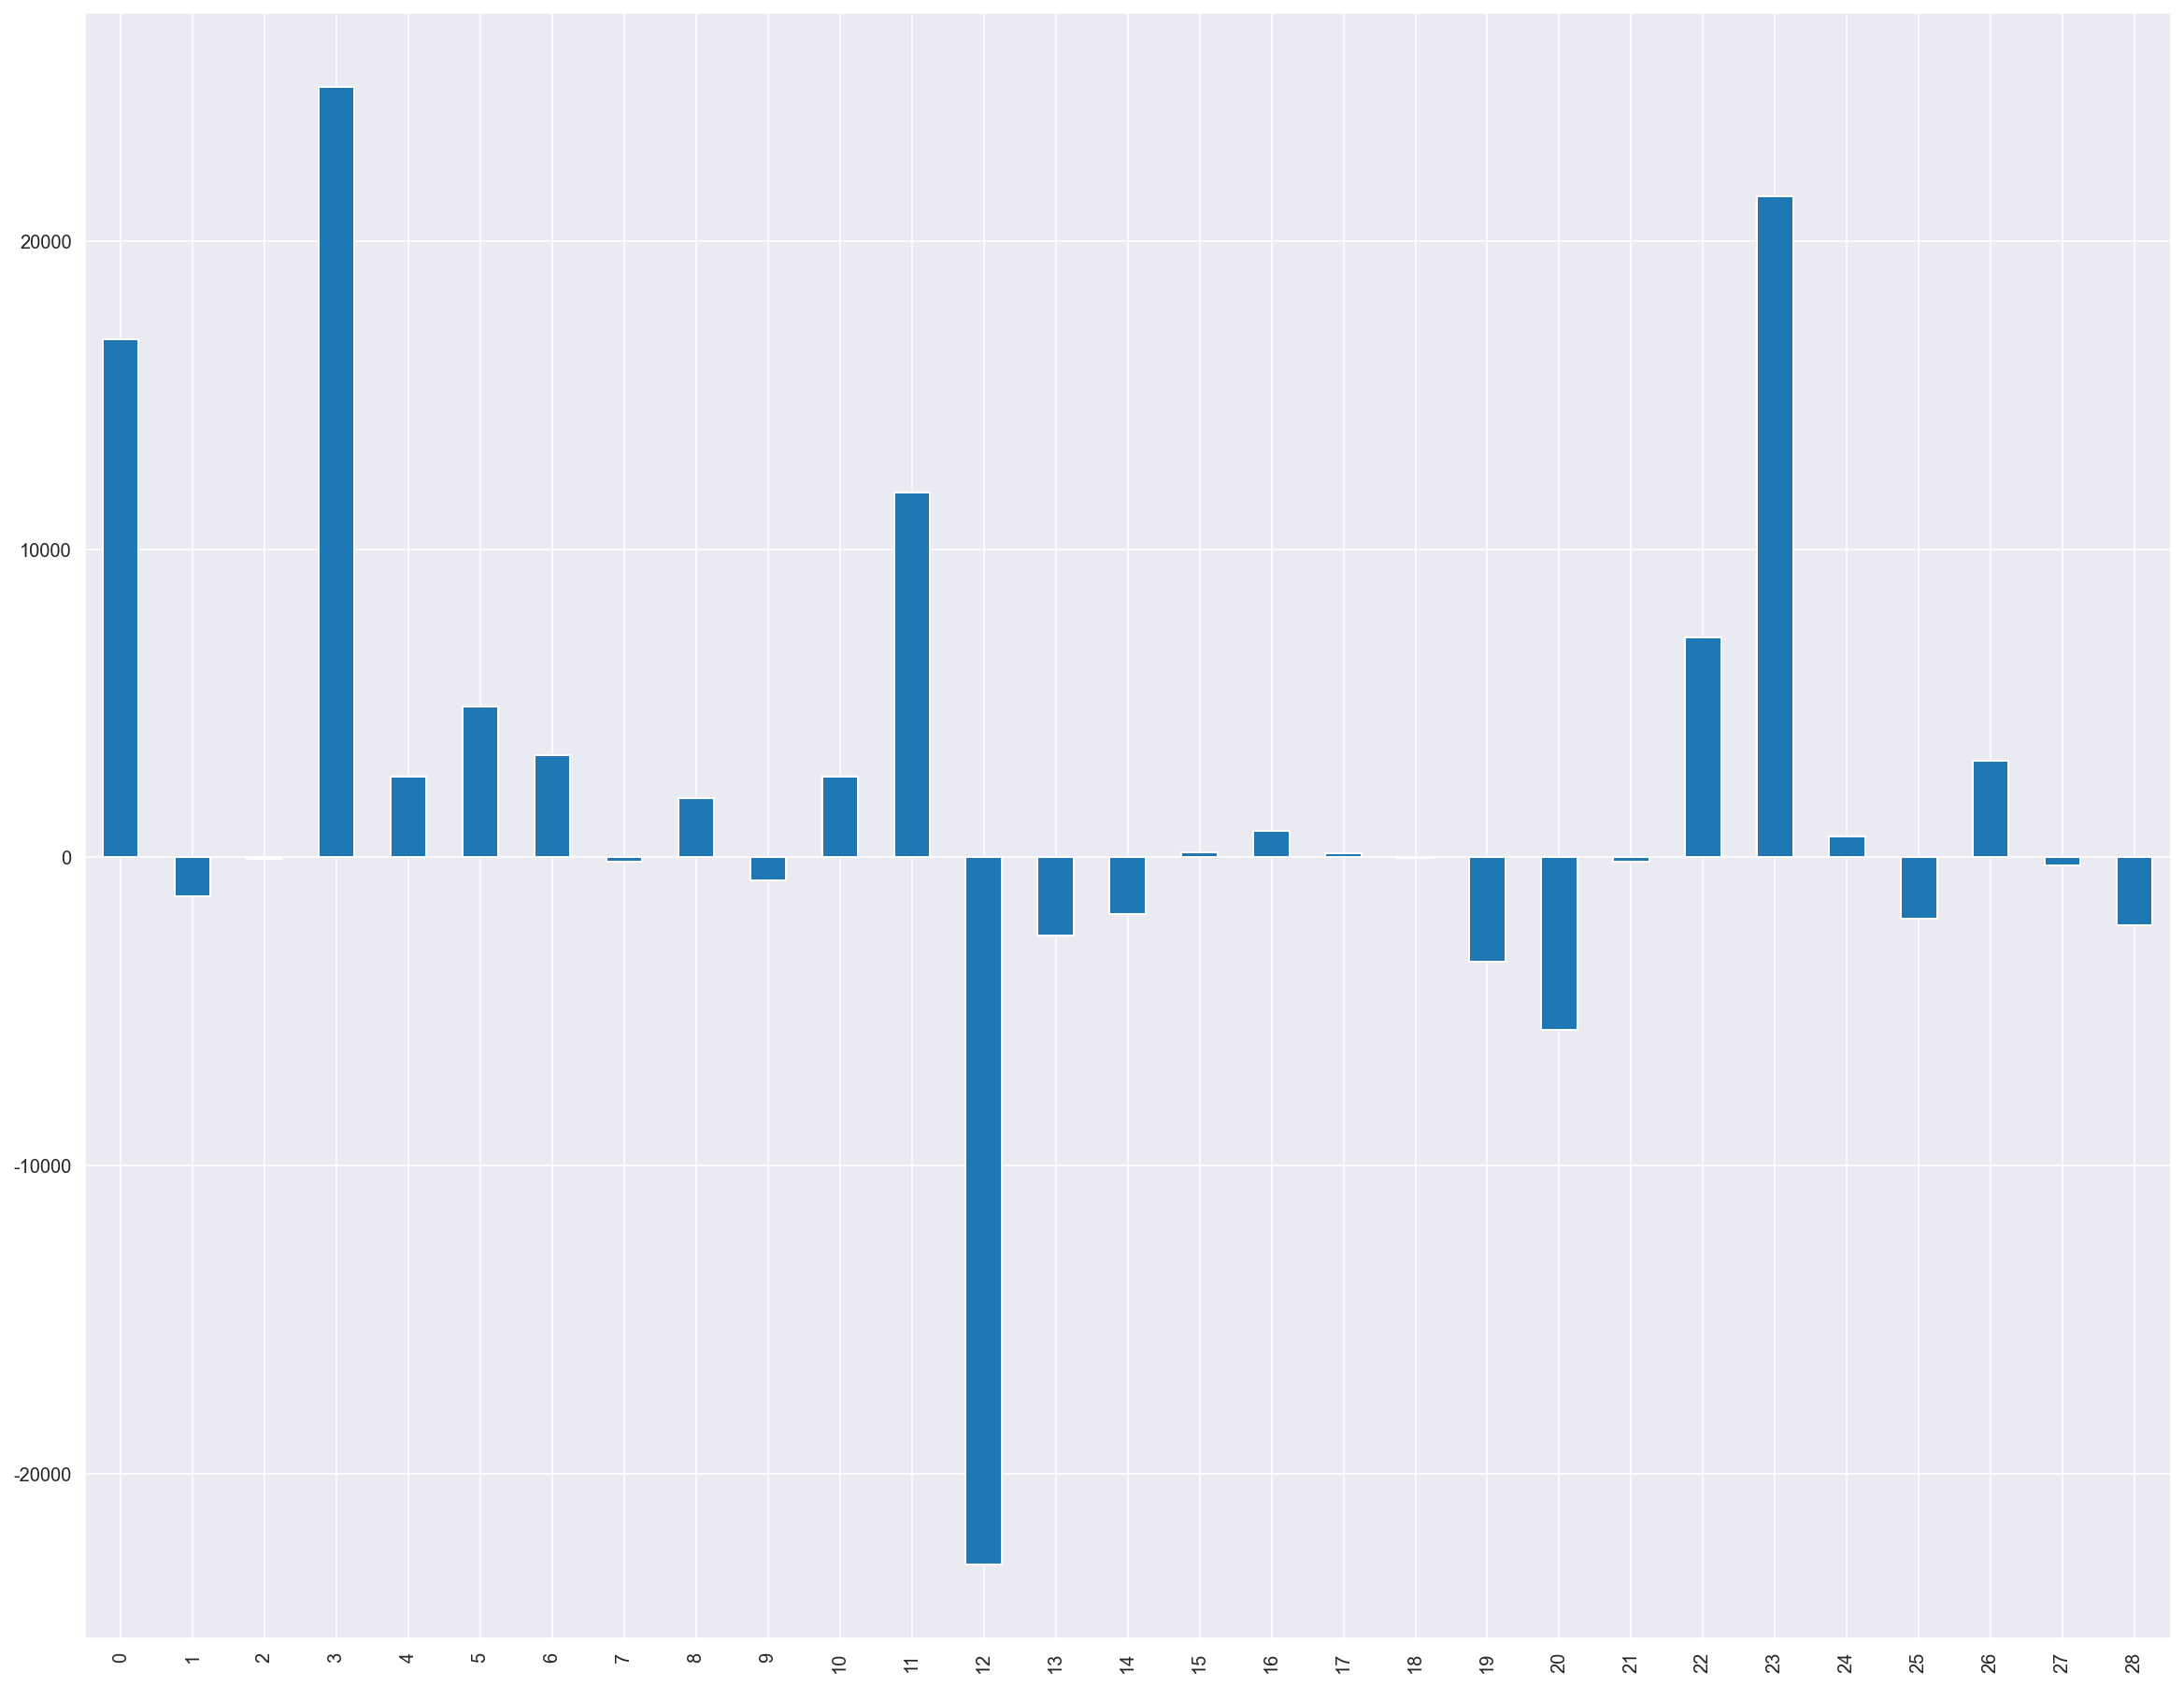

In [29]:
# 회귀계수를 리스트로 변환하는 작업
coefs = model.params.tolist()
# coef의 파람스(?)를 리스트로 바꾸는..

coefs_series = pd.Series(coefs)
# 시리즈로 (판다스에서 시리즈를 시각화가능해서)

# 변수명(index)를 리스트로 변환하는 작업
x_labels = model.params.index.tolist()
# 모델이 갖고잇는 파람스의 인덱스를 리스트로 변환해서 갖고올거

coefs_series.plot(kind = 'bar')
# 판다스는 기본형이 선그래프. kind로 종류를 바꿀수잇음
# 상관계수에 따라서 그래프가 그려짐

[Text(0, 0, 'const'),
 Text(1, 0, 'BABIP'),
 Text(2, 0, 'ERA'),
 Text(3, 0, 'FIP'),
 Text(4, 0, 'KIA'),
 Text(5, 0, 'KT'),
 Text(6, 0, 'LG'),
 Text(7, 0, 'LOB%'),
 Text(8, 0, 'NC'),
 Text(9, 0, 'RA9-WAR'),
 Text(10, 0, 'SK'),
 Text(11, 0, 'WAR'),
 Text(12, 0, 'kFIP'),
 Text(13, 0, '경기'),
 Text(14, 0, '두산'),
 Text(15, 0, '롯데'),
 Text(16, 0, '볼넷/9'),
 Text(17, 0, '블론'),
 Text(18, 0, '삼성'),
 Text(19, 0, '삼진/9'),
 Text(20, 0, '선발'),
 Text(21, 0, '세'),
 Text(22, 0, '승'),
 Text(23, 0, '연봉(2017)'),
 Text(24, 0, '이닝'),
 Text(25, 0, '패'),
 Text(26, 0, '한화'),
 Text(27, 0, '홀드'),
 Text(28, 0, '홈런/9')]

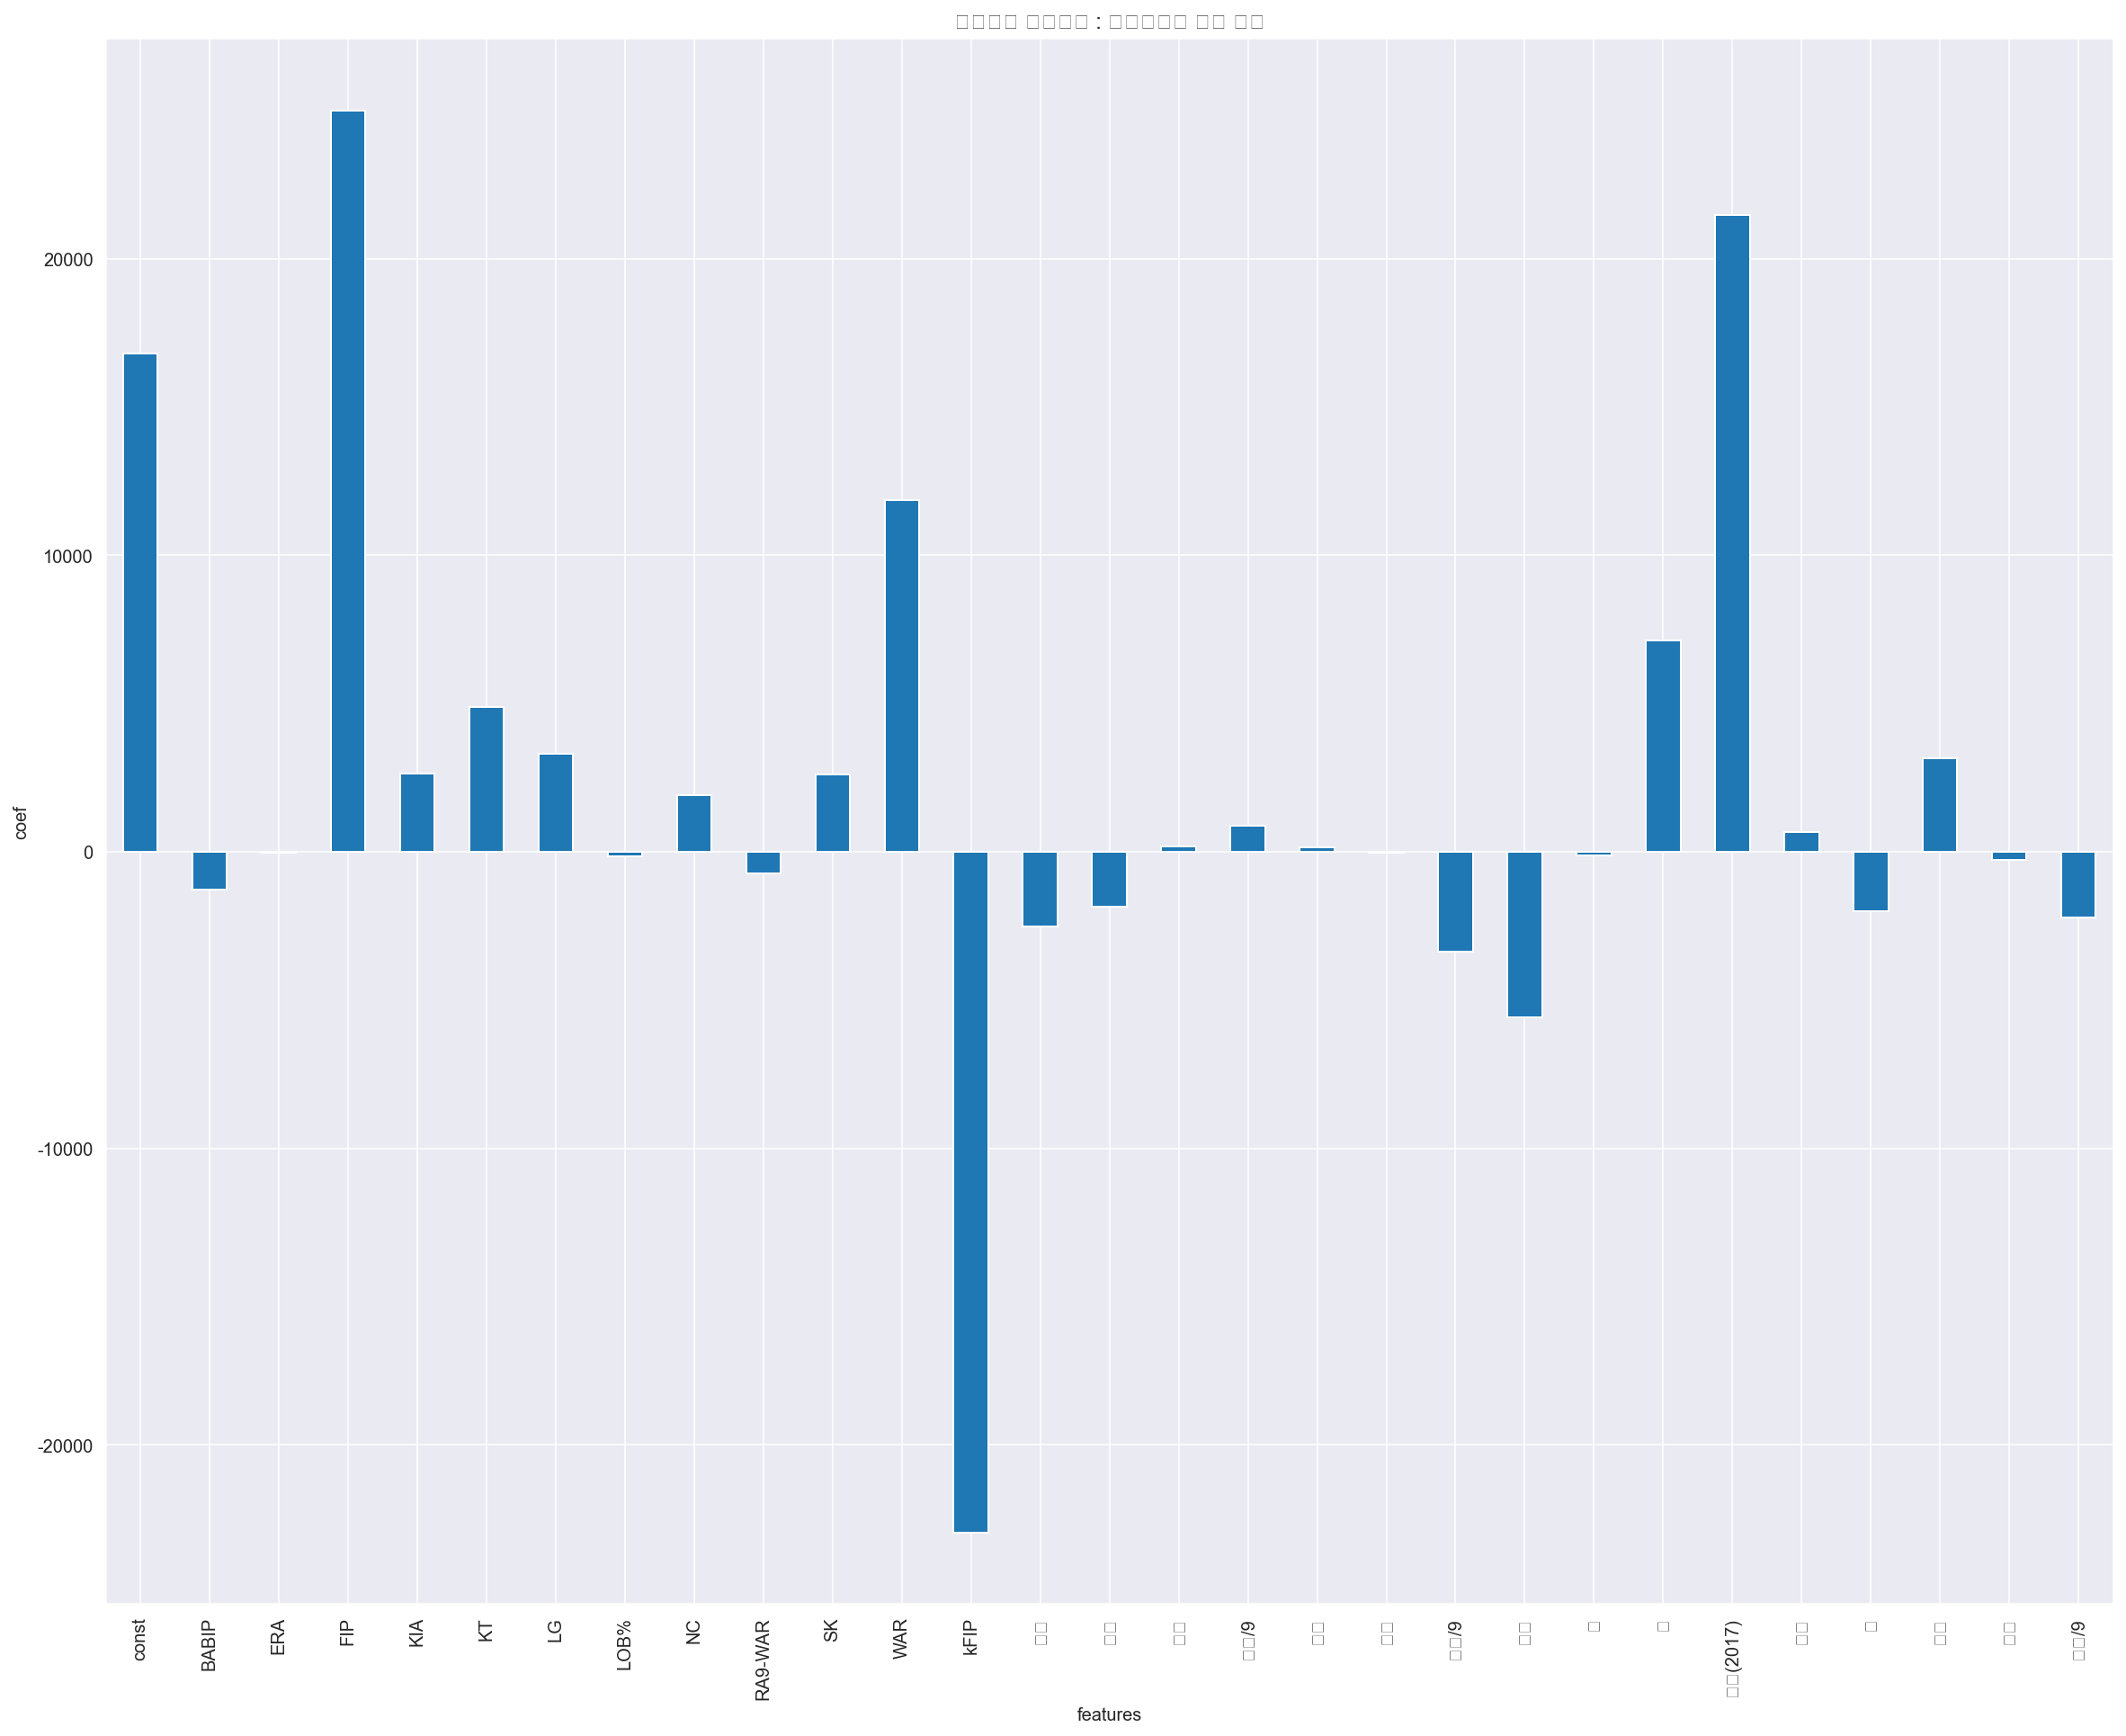

In [30]:
# 변수에 담고 제목 담음
ax = coefs_series.plot(kind = 'bar')
ax.set_title('컬럼들의 상관계수 : 영향력있는 컬럼 추출')
ax.set_xlabel('features')
ax.set_ylabel('coef')
ax.set_xticklabels(x_labels)

# 위쪽:양의상관관계
# 아래쪽:음의상관관계

In [31]:
# 익숙한 히트맵으로 만들어보기

## 피처들의 상관관계를 분석하는 시각화 - Heatmap

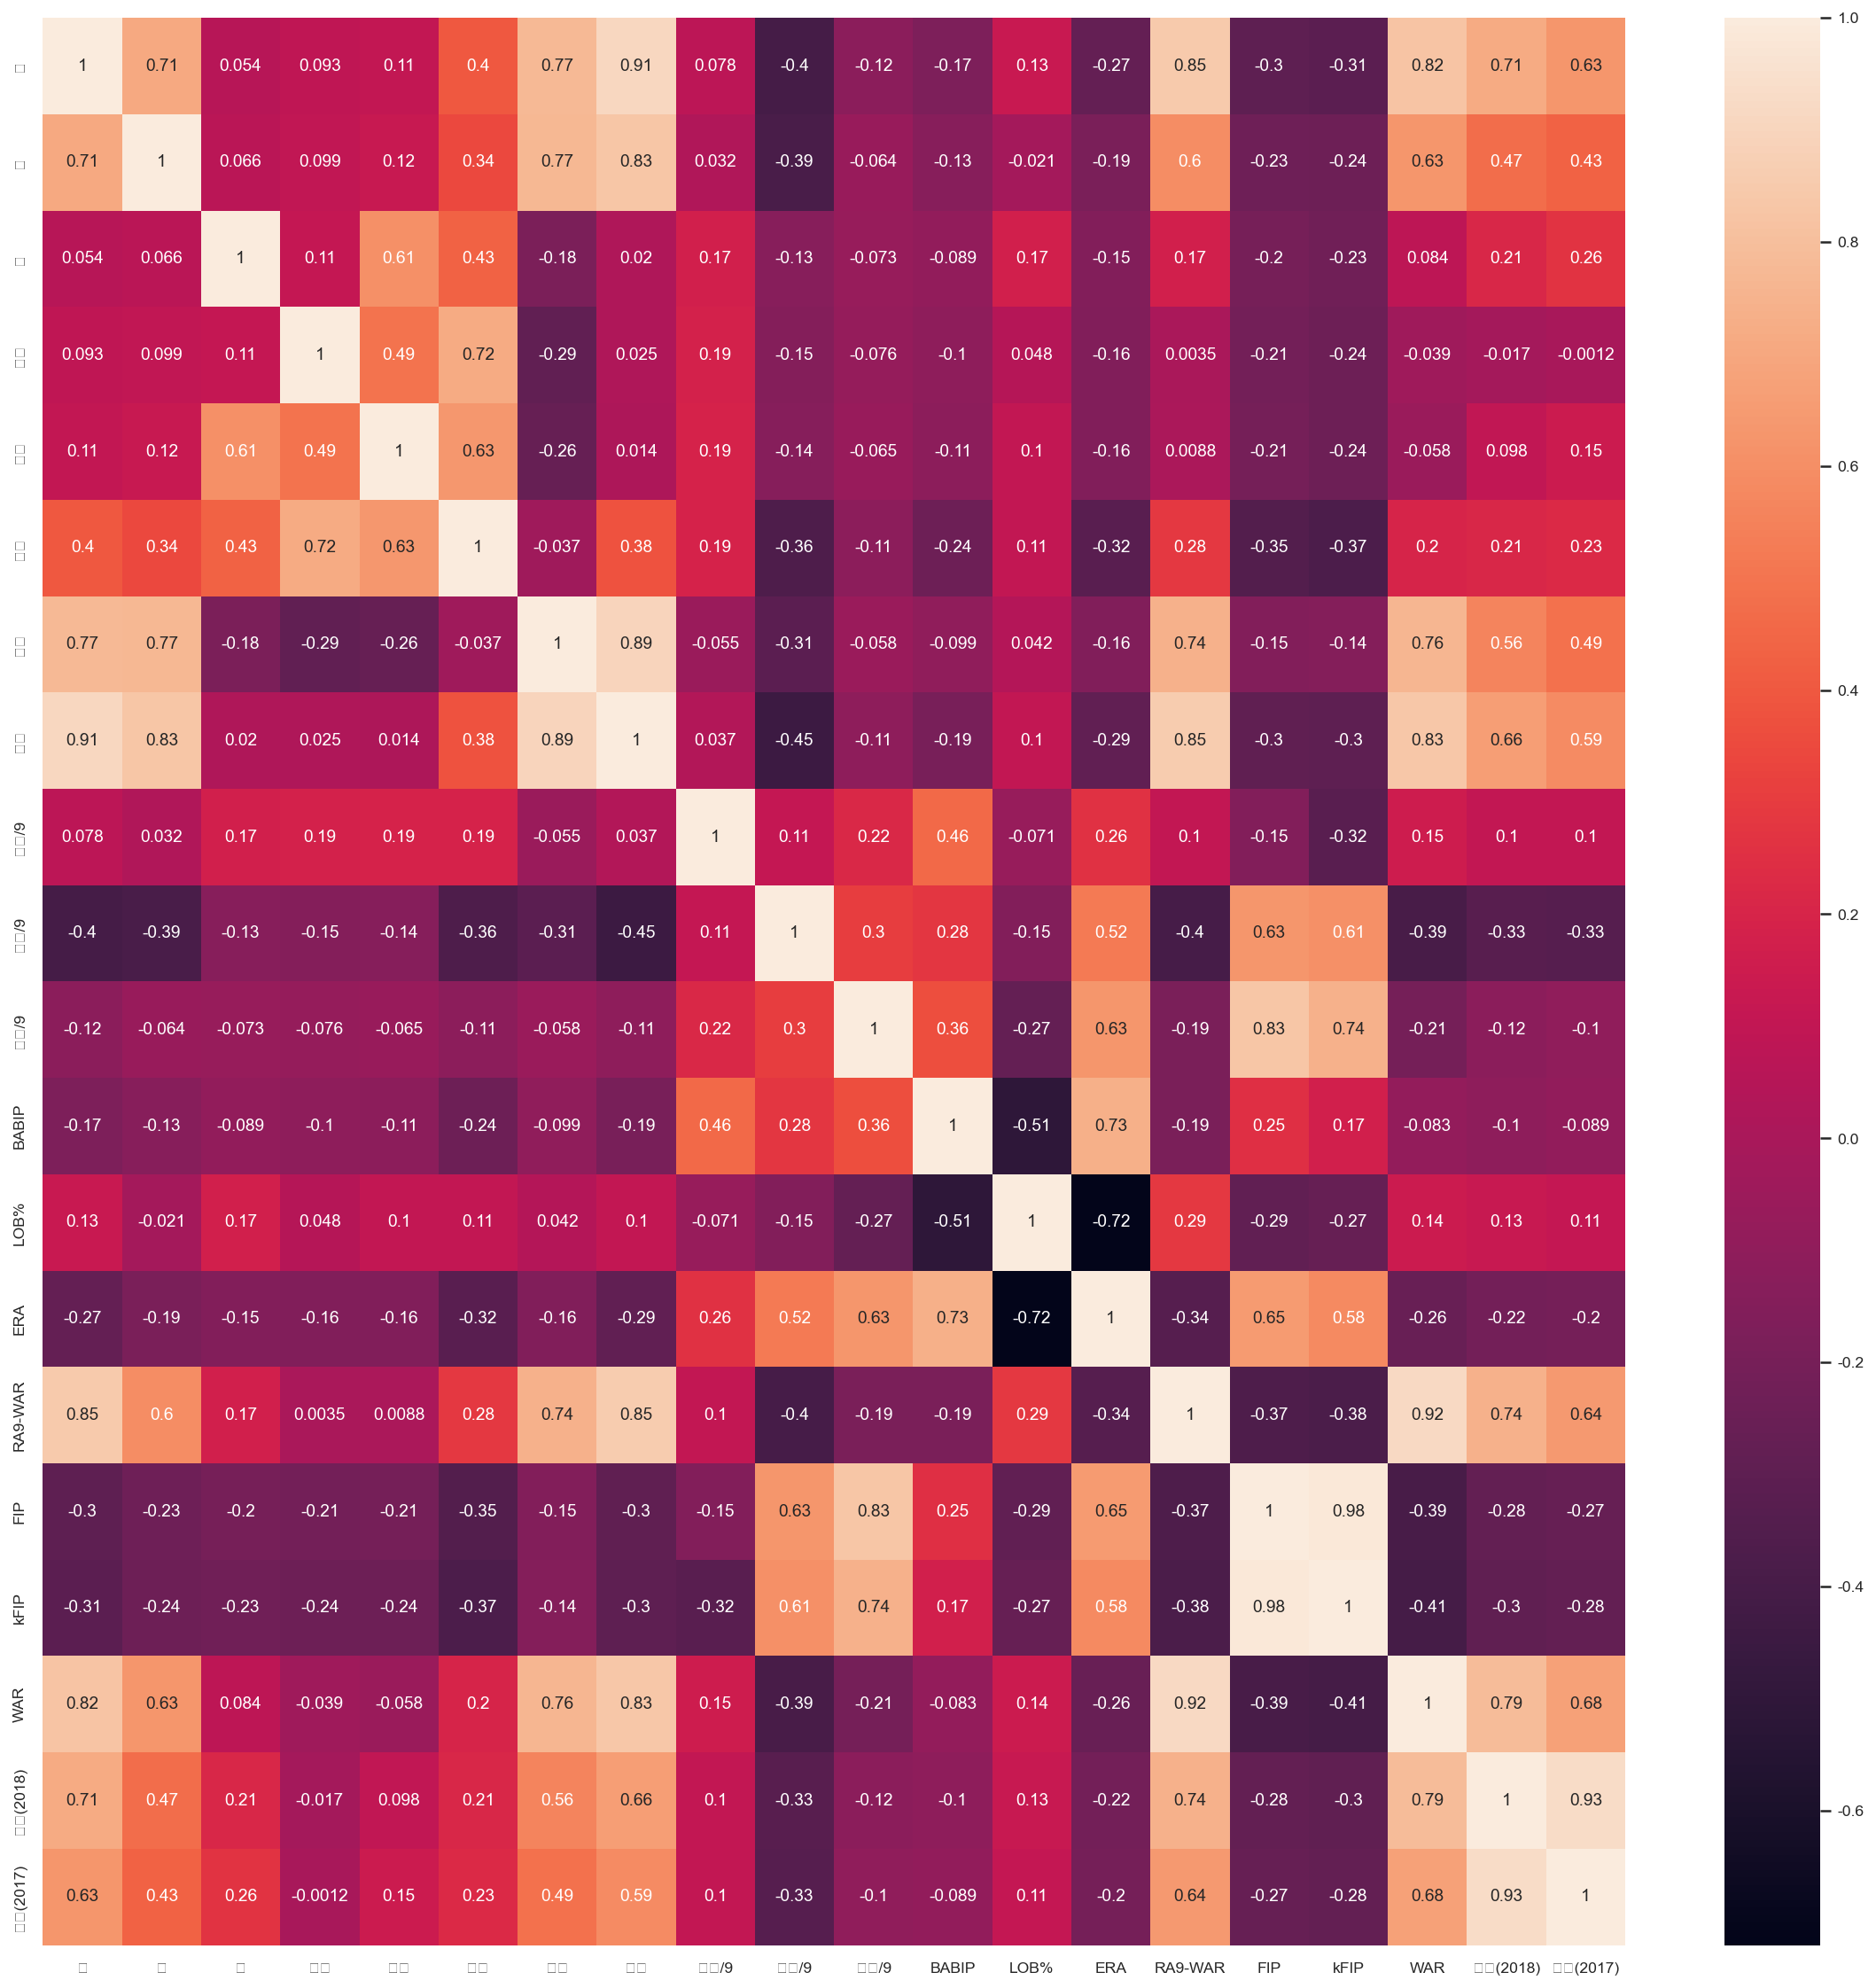

In [32]:
## 피처들의 상관관계를 분석하는 시각화 - Heatmap

picher_corr = picher.corr()

# 히트맵
plt.figure(figsize=(20, 20))
sns.set(font_scale=0.8)
sns.heatmap(picher_corr, annot=True, cbar=True)
plt.show()

# 기본 히트맵 

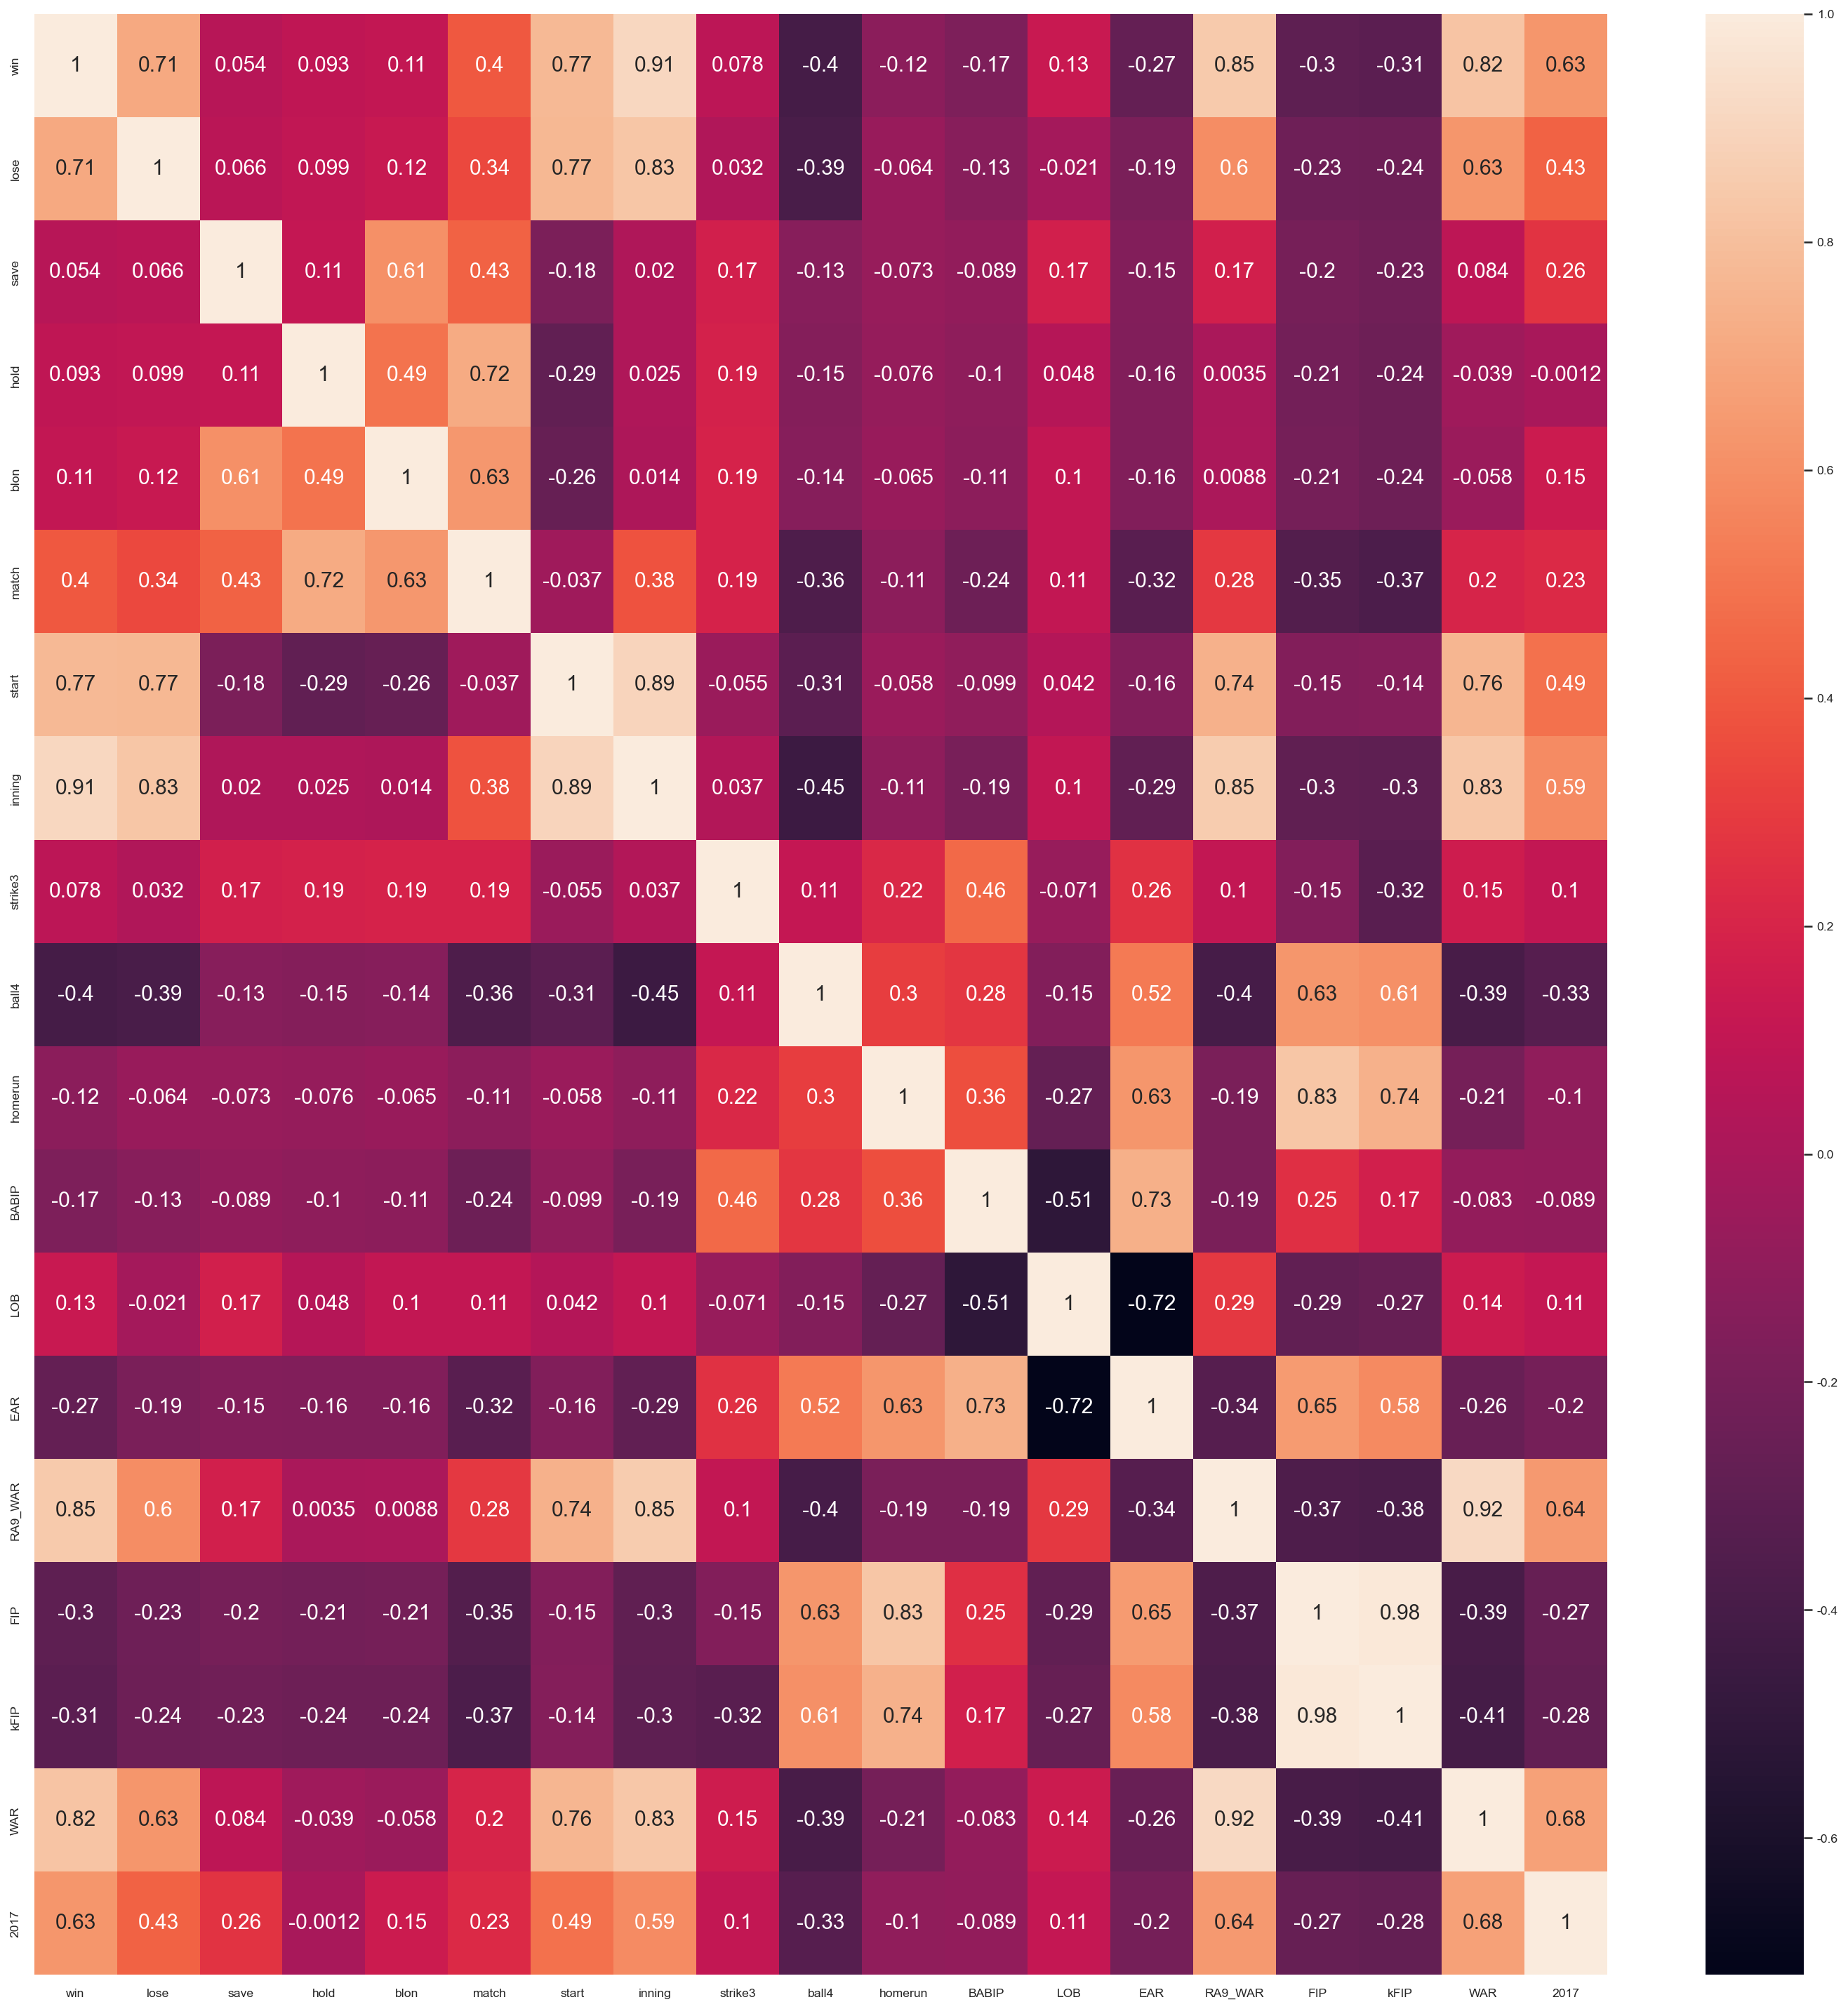

In [33]:
# 잘보이게 이것저것 만진 히트맵
# 피처들의 상관계수 산출하기
corr = picher_df[scale_columns].corr(method='pearson')
show_cols=['win','lose','save','hold','blon','match','start',
           'inning','strike3','ball4','homerun','BABIP','LOB',
           'EAR','RA9_WAR','FIP','kFIP','WAR','2017']

# 히트맵
plt.figure(figsize=(20, 20))
sns.set(font_scale=0.8)
sns.heatmap(corr.values, 
            annot=True,
            annot_kws={'size':15},
            cbar=True,
            xticklabels=show_cols,
            yticklabels=show_cols) 

plt.tight_layout()
plt.show()

<AxesSubplot:>

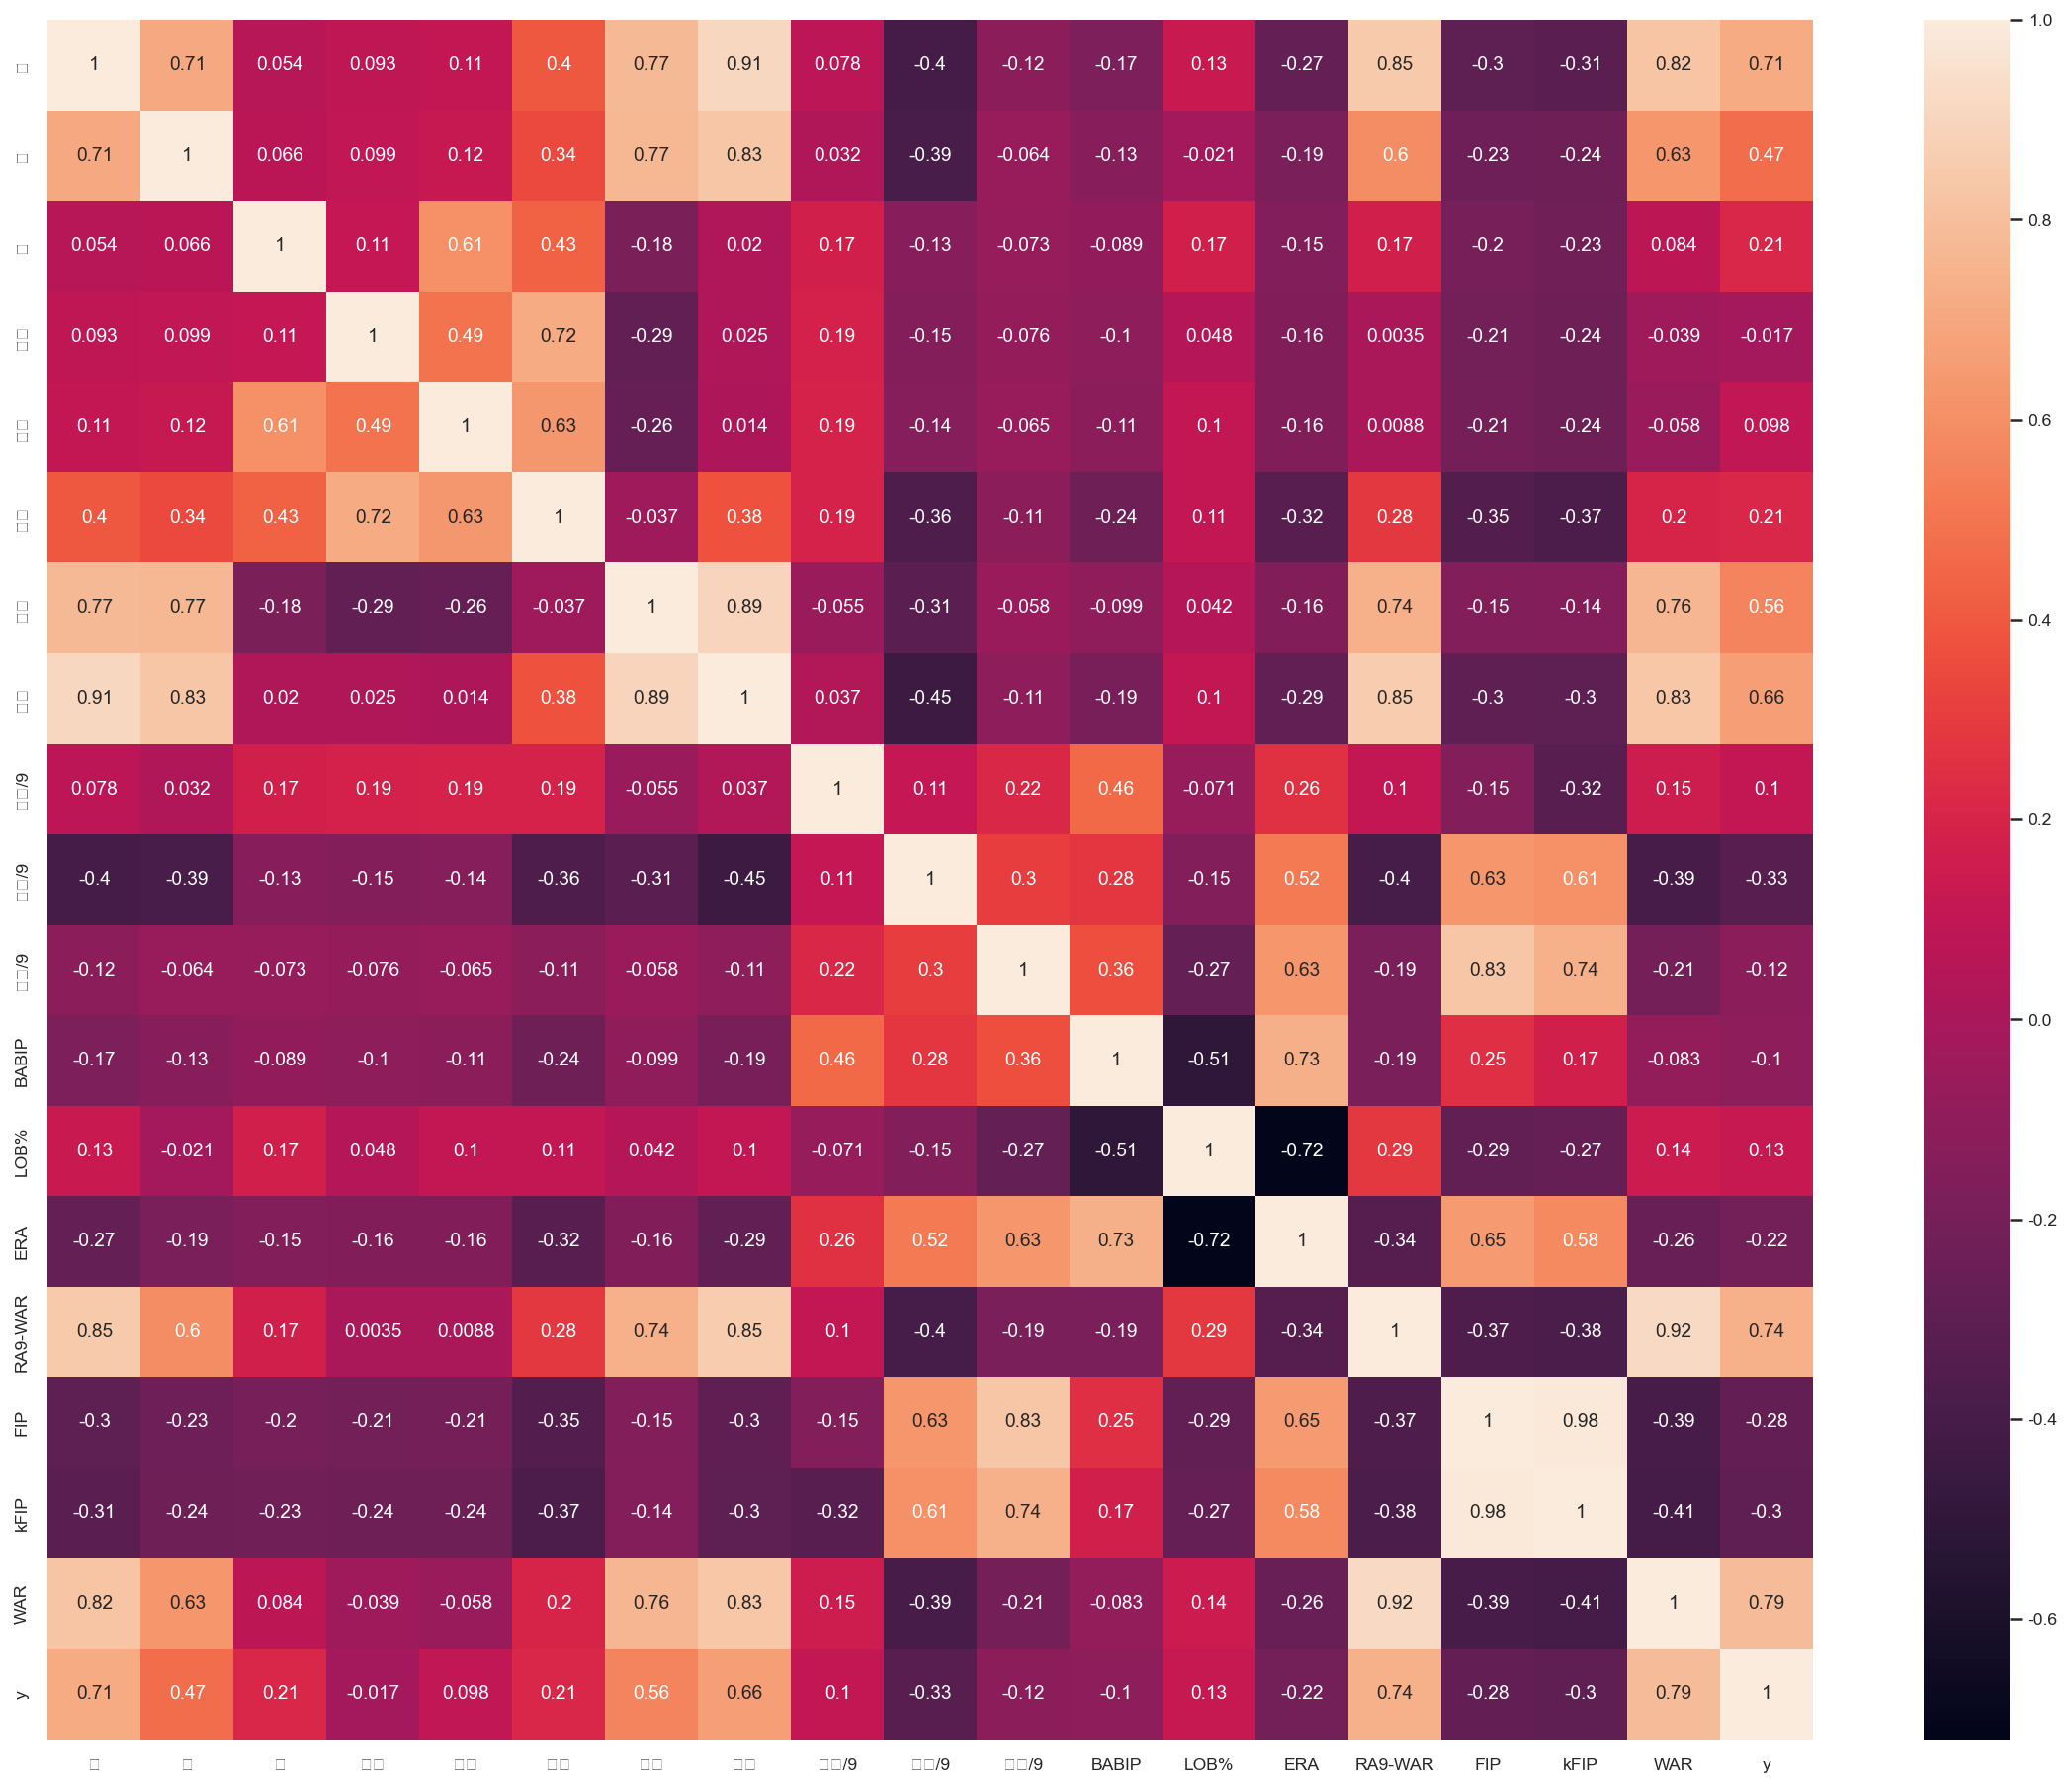

In [34]:
ddff = picher_df.iloc[:,1:20]
sns.heatmap(ddff.corr(), annot = True)

# 지영이가 다듬은거

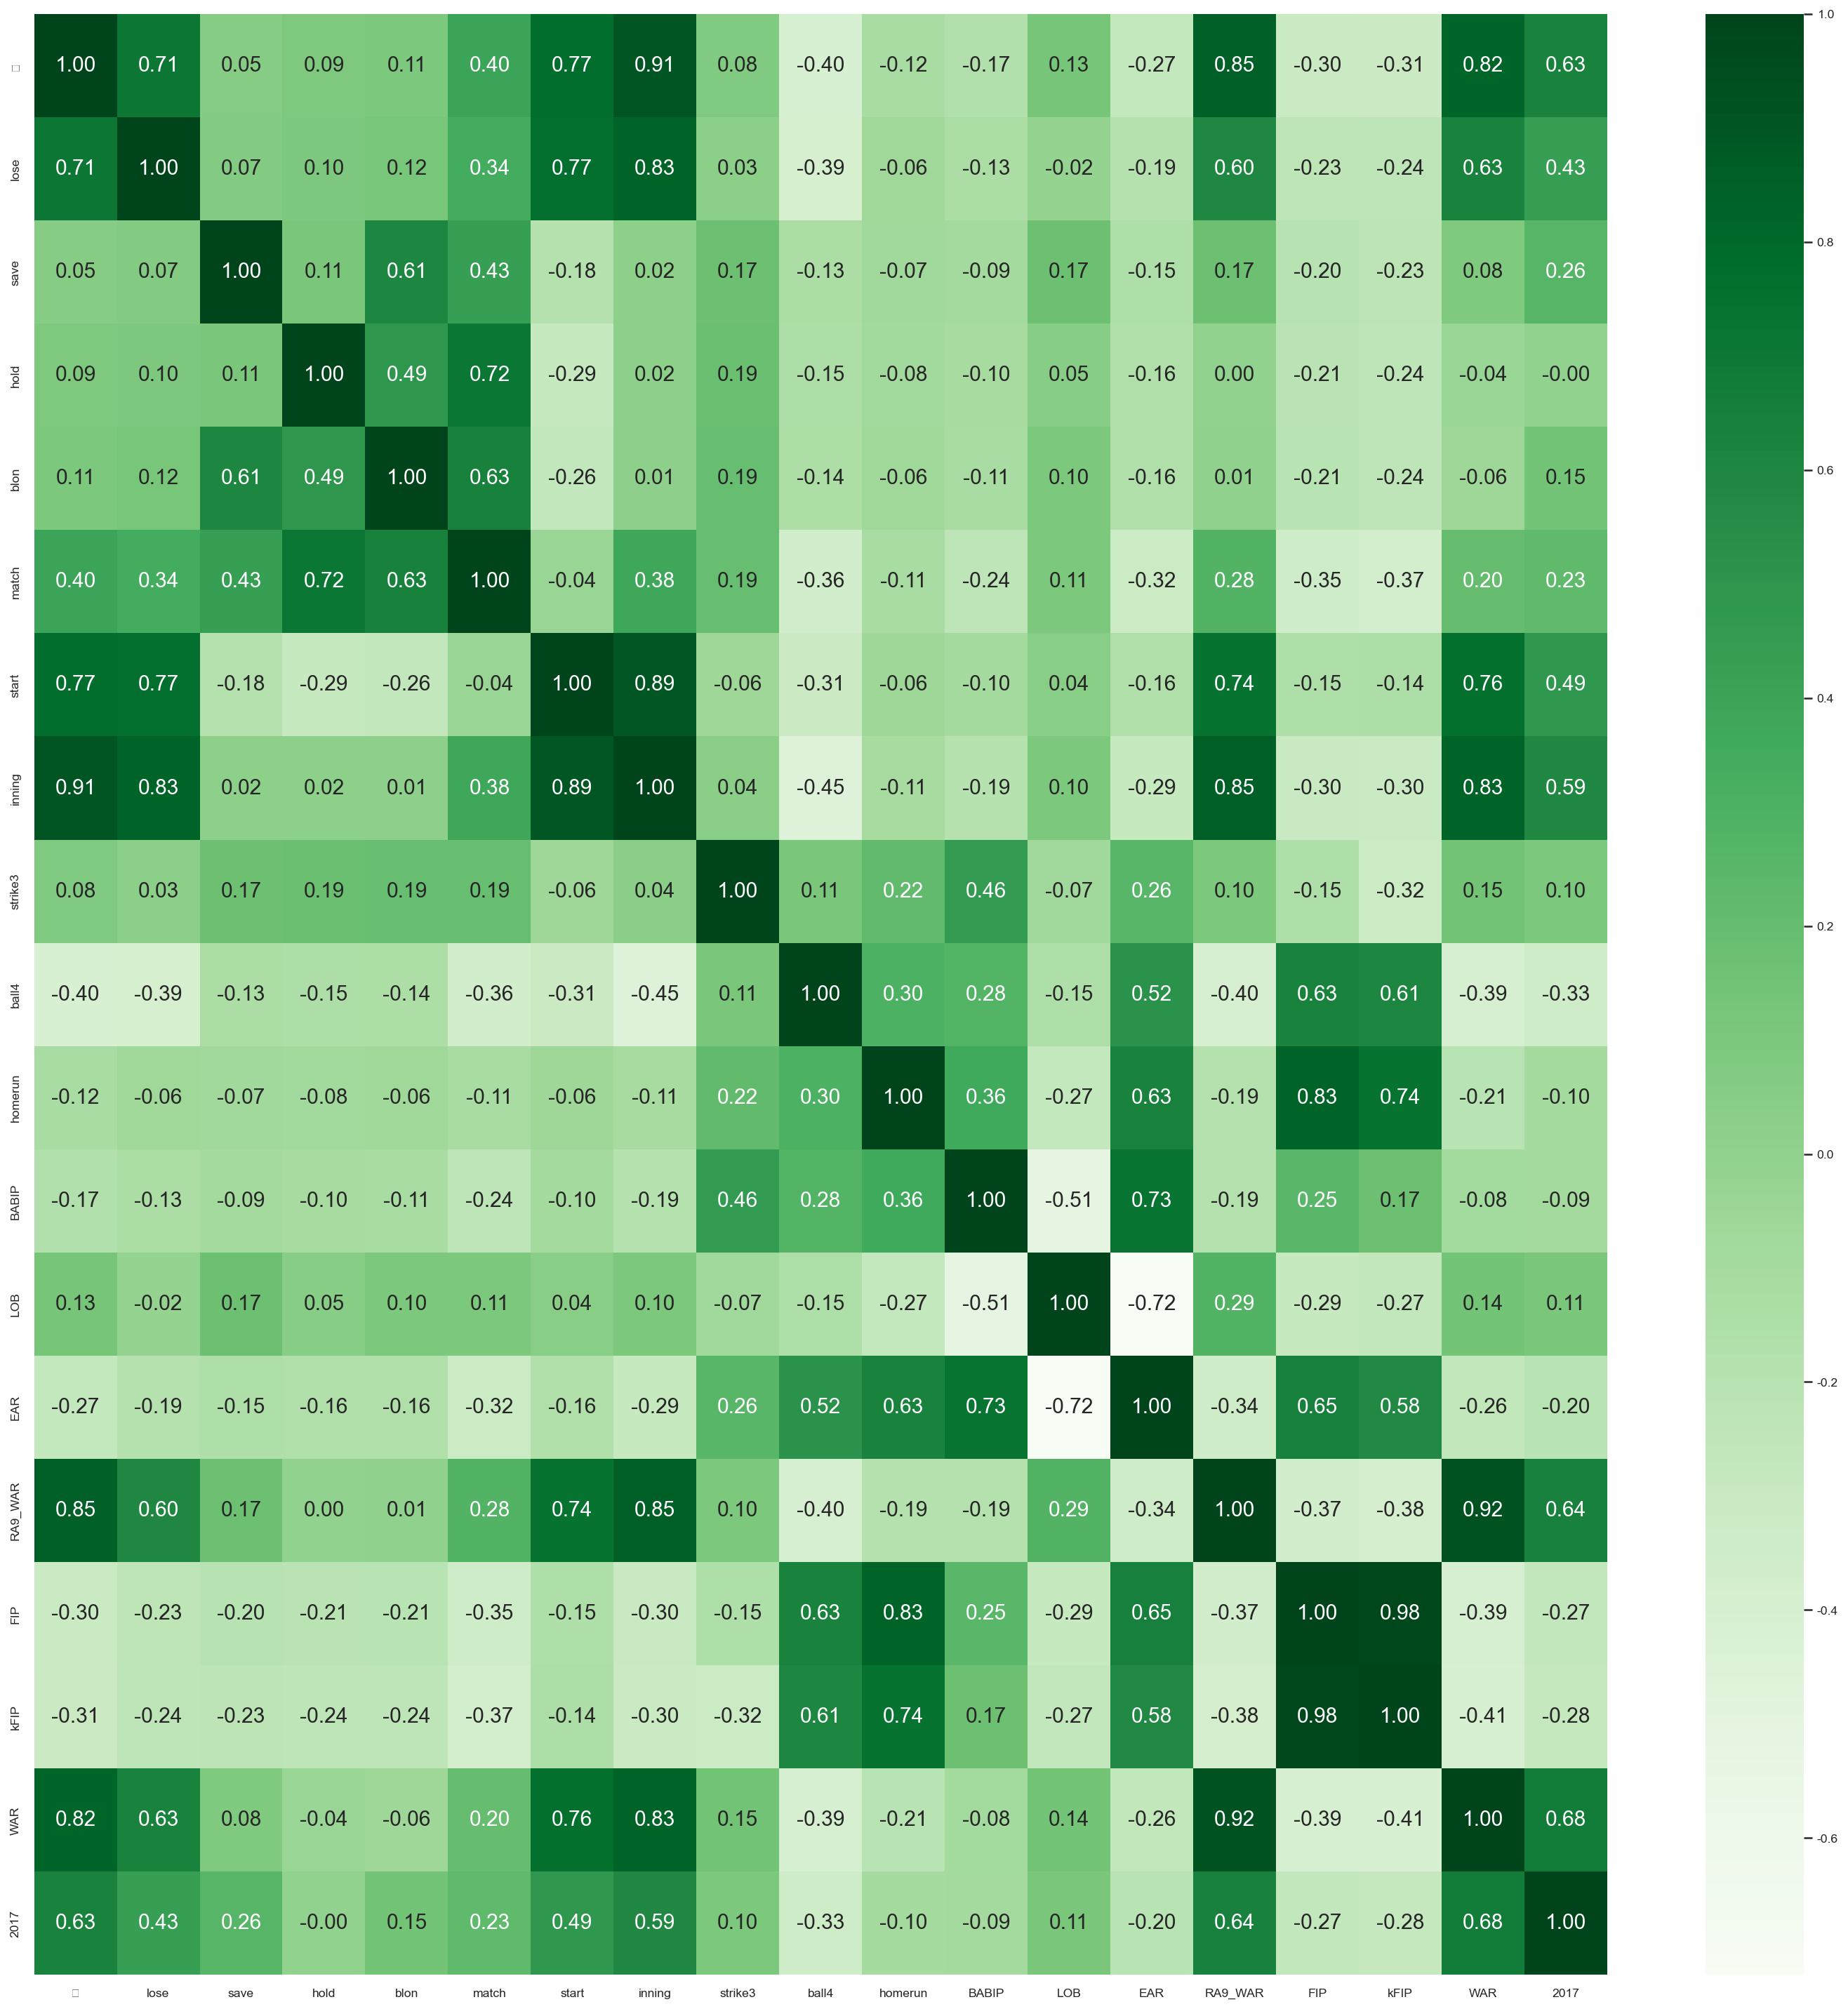

In [35]:
# 컬러히트맵
# 피처 간의 상관계수 행렬을 계산합니다. 
corr=picher_df[scale_columns].corr(method='pearson')
show_cols=['승','lose','save','hold','blon','match','start',
           'inning','strike3','ball4','homerun','BABIP','LOB',
           'EAR','RA9_WAR','FIP','kFIP','WAR','2017']

# CORR 행렬 히트맵을 시각화합니다.
plt.figure(figsize=(20,20))
sns.set(font_scale=0.8)
sns.heatmap(corr.values, annot=True, cbar=True, fmt='.2f',
            annot_kws={'size':15},
            xticklabels = show_cols,
            yticklabels = show_cols,
           cmap='Greens')
plt.tight_layout()
plt.show()

## 예측값, 실제값 데이터 분석

In [36]:
def get_top_error_data(y_test, pred, n_tops=5):
    # 예측값, 실제값 데이터 프레임 생성
    result_df = pd.DataFrame(y_test.values, columns=['real_y'])
    result_df['pred_y'] = np.round(pred)
    result_df['diff'] = np.abs(result_df['real_y'] - result_df['pred_y'])
    
    # 예측값과 실제값의 차이가 큰 데이터 순서대로 추출
    print(result_df.sort_values('diff', ascending=False)[:n_tops])
    
get_top_error_data(y_test, pred, n_tops = 10)

    real_y    pred_y     diff
10   35000   11950.0  23050.0
26   29000   46325.0  17325.0
7   100000  116831.0  16831.0
30   16000   30373.0  14373.0
28    9000   -3244.0  12244.0
13   23000   34698.0  11698.0
9    50000   39091.0  10909.0
25    4700   -5447.0  10147.0
24   45000   34979.0  10021.0
12   15000    7892.0   7108.0


## 회귀분석의 성능을 향상시키기 위해 다중공선성 확인

In [37]:
# 분산 팽창 요인(VIF) 
# 일반적으로 팽창계수(VIF)가 10이 넘으면 제거
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 피처들의 vif계수 확인
vif = pd.DataFrame()
# 판다스의 빈데이터프레임으로 만들기
vif['VIF factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# 이중내포
vif['features'] = X.columns
# VIF factor와 feature라는 이름으로 각각 뭔가 담음

vif.round(1)
# 소숫점 첫째자리까지 찍기

,VIF factor,features
0,3.2,BABIP
1,10.6,ERA
2,14238.3,FIP
3,1.1,KIA
4,1.1,KT
5,1.1,LG
6,4.3,LOB%
7,1.1,NC
8,13.6,RA9-WAR
9,1.1,SK


일반적으로 vif가 10이 넘으면 제거하는데<br>
이 데이터를 이해하고 전부 제거하지말고 생각하고 골라내야함<br>
아까 히트맵에서도 그렇고 FIP와 kFIP가 뭔지는 모르겟지만 수피가 비슷하게 높게나옴..<br>
얘랑 같은 역할(?)을 하는 컬럼이라는 얘기(다중공선성)<br>
그래서 둘 중 하나만 쓸건데<br>
잘 모르는 도메인이지만 야구구단으로 알고잇는 애들 제낄수잇고<br>
WAR(승리기여도)라는것도 잇네<br>
우리가 지금찾는건 투수의 연봉예측<br>
투수의 연봉에 +가 되는 요소 -가 되는요소 생각하면서<br>
이런 과정을 거쳐 컬럼을 적절히 골라내고 다시 해보면 다중공선성 체크해보고<br>
과대적합/과소적합을 해결하는 방법들도 적절히 사용해보고<br>
파라미터도 조정해보고(그리드서치)<br>
최적의 모델을 향해 보정해보는것<br>

## 적절한 피처를 이용하여 다시 모델학습

- 분석가 임의대로 하는 점이 관건

In [38]:
# X와 y를 재설정
X = picher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '선발', '연봉(2017)']]
y = picher_df['y'] # y는 그대로 가져오면 됨


# 훈련세트 트레인세트 쪼개기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# LinearRegression
lr = LinearRegression()
# 지금은 어떤값도 주지않은 빈껍데기 선형회귀
model = lr.fit(X_train, y_train)
# 학습은 트레인 데이터만
pred = model.predict(X_test)
# lr학습시킨걸 model에 담아서 사용 (밑에서 쓰려고)
# 예측결과를 pred에 담음ㅇ


# 평가함수 호출
evaluate_rger(y_test, pred)

MAE : 5194.151, RMSE : 7366.828


In [39]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
# 훈련데이터와 테스트데이터 둘다확인
# 훈련데이터 점수가 높음 -> 과대적합이 의심됨
# 지나치게 모델학습에 치중햇다는 소리
# 이럴때 규제를 줘야함(릿지나 라쏘..)

0.9212109763382361
0.8772596076714894


In [40]:
# 이 과정이 끝나고 VIF를 다시 확인해보면 많이 떨어졋을거

In [41]:
# 다시 피처들의 vif계수 확인
vif = pd.DataFrame()
# 판다스의 빈데이터프레임으로 만들기
vif['VIF factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# 이중내포
vif['features'] = X.columns
# VIF factor와 feature라는 이름으로 각각 뭔가 담음

vif.round(1)
# 소숫점 첫째자리까지 찍기

,VIF factor,features
0,2.0,FIP
1,4.1,WAR
2,2.0,볼넷/9
3,1.2,삼진/9
4,2.7,선발
5,1.9,연봉(2017)


점수 바뀐거 확인

### 예상 연봉과 실제 연봉 비교

In [42]:
picher_df.head()

,선수명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,...,연봉(2017),KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,켈리,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,0.672099,...,2.734705,0,0,0,0,1,0,0,0,0
1,소사,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,0.134531,...,1.337303,0,0,1,0,0,0,0,0,0
2,양현종,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,0.109775,...,5.329881,1,0,0,0,0,0,0,0,0
3,차우찬,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,0.350266,...,3.333592,0,0,1,0,0,0,0,0,0
4,레일리,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,0.155751,...,2.734705,0,0,0,0,0,0,1,0,0


In [43]:
# 예측연봉 컬럼 추가

X = picher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '선발', '연봉(2017)']]
predict_2018 = model.predict(X)
picher_df['예측연봉(2018)'] = pd.Series(predict_2018)

### 최종 예측 결과 추출

In [44]:
# 원본 데이터 다시 로딩
picher = pd.read_csv('C:/k_digital/source/data/picher_stats_2017.csv')
picher = picher[['선수명', '연봉(2017)']]
# 이것만 가져와서 데이터프레임으로 만듦


- 선수명 실제연봉(2018) 예측연봉(2018) 작년연봉(2017)
<br>이런 형식으로 출력되게 하고싶다

In [46]:
# 여기다 2018 연봉을 합칠거임
result_df = picher_df.sort_values(by=['y'], ascending=False)
result_df.drop(['연봉(2017)'], axis=1, inplace=True, errors='ignore')
result_df = result_df.merge(picher, on=['선수명'], how='left')
result_df = result_df[['선수명', 'y', '예측연봉(2018)', '연봉(2017)']]
result_df.columns = ['선수명', '실제연봉(2018)', '예측연봉(2018)', '작년연봉(2017)']

In [47]:
result_df

,선수명,실제연봉(2018),예측연봉(2018),작년연봉(2017)
0,양현종,230000,178967.865515,150000
1,켈리,140000,130806.118346,85000
2,소사,120000,94811.346360,50000
3,정우람,120000,120425.145012,120000
4,레일리,111000,108855.005059,85000
...,...,...,...,...
147,장지훈,2800,-5011.865762,2700
148,차재용,2800,-2258.104621,2800
149,성영훈,2700,7021.581193,2700
150,정동윤,2700,3720.778431,2700


In [48]:
# 재계약하여 연봉이 변화한 선수만을 대상으로 관찰
result_df = result_df[result_df['작년연봉(2017)'] != result_df['실제연봉(2018)']]

# 인덱스 정리
result_df = result_df.reset_index()
result_df = result_df.iloc[:10, :]
result_df.head(10)

,index,선수명,실제연봉(2018),예측연봉(2018),작년연봉(2017)
0,0,양현종,230000,178967.865515,150000
1,1,켈리,140000,130806.118346,85000
2,2,소사,120000,94811.346360,50000
3,4,레일리,111000,108855.005059,85000
4,7,피어밴드,85000,60955.316254,35000
5,13,배영수,50000,56985.407983,55000
6,21,안영명,35000,20230.177908,20000
7,22,채병용,30000,22220.094505,25000
8,23,류제국,29000,44255.345932,35000
9,24,박정진,25000,31138.853353,33000


<AxesSubplot:xlabel='선수명'>

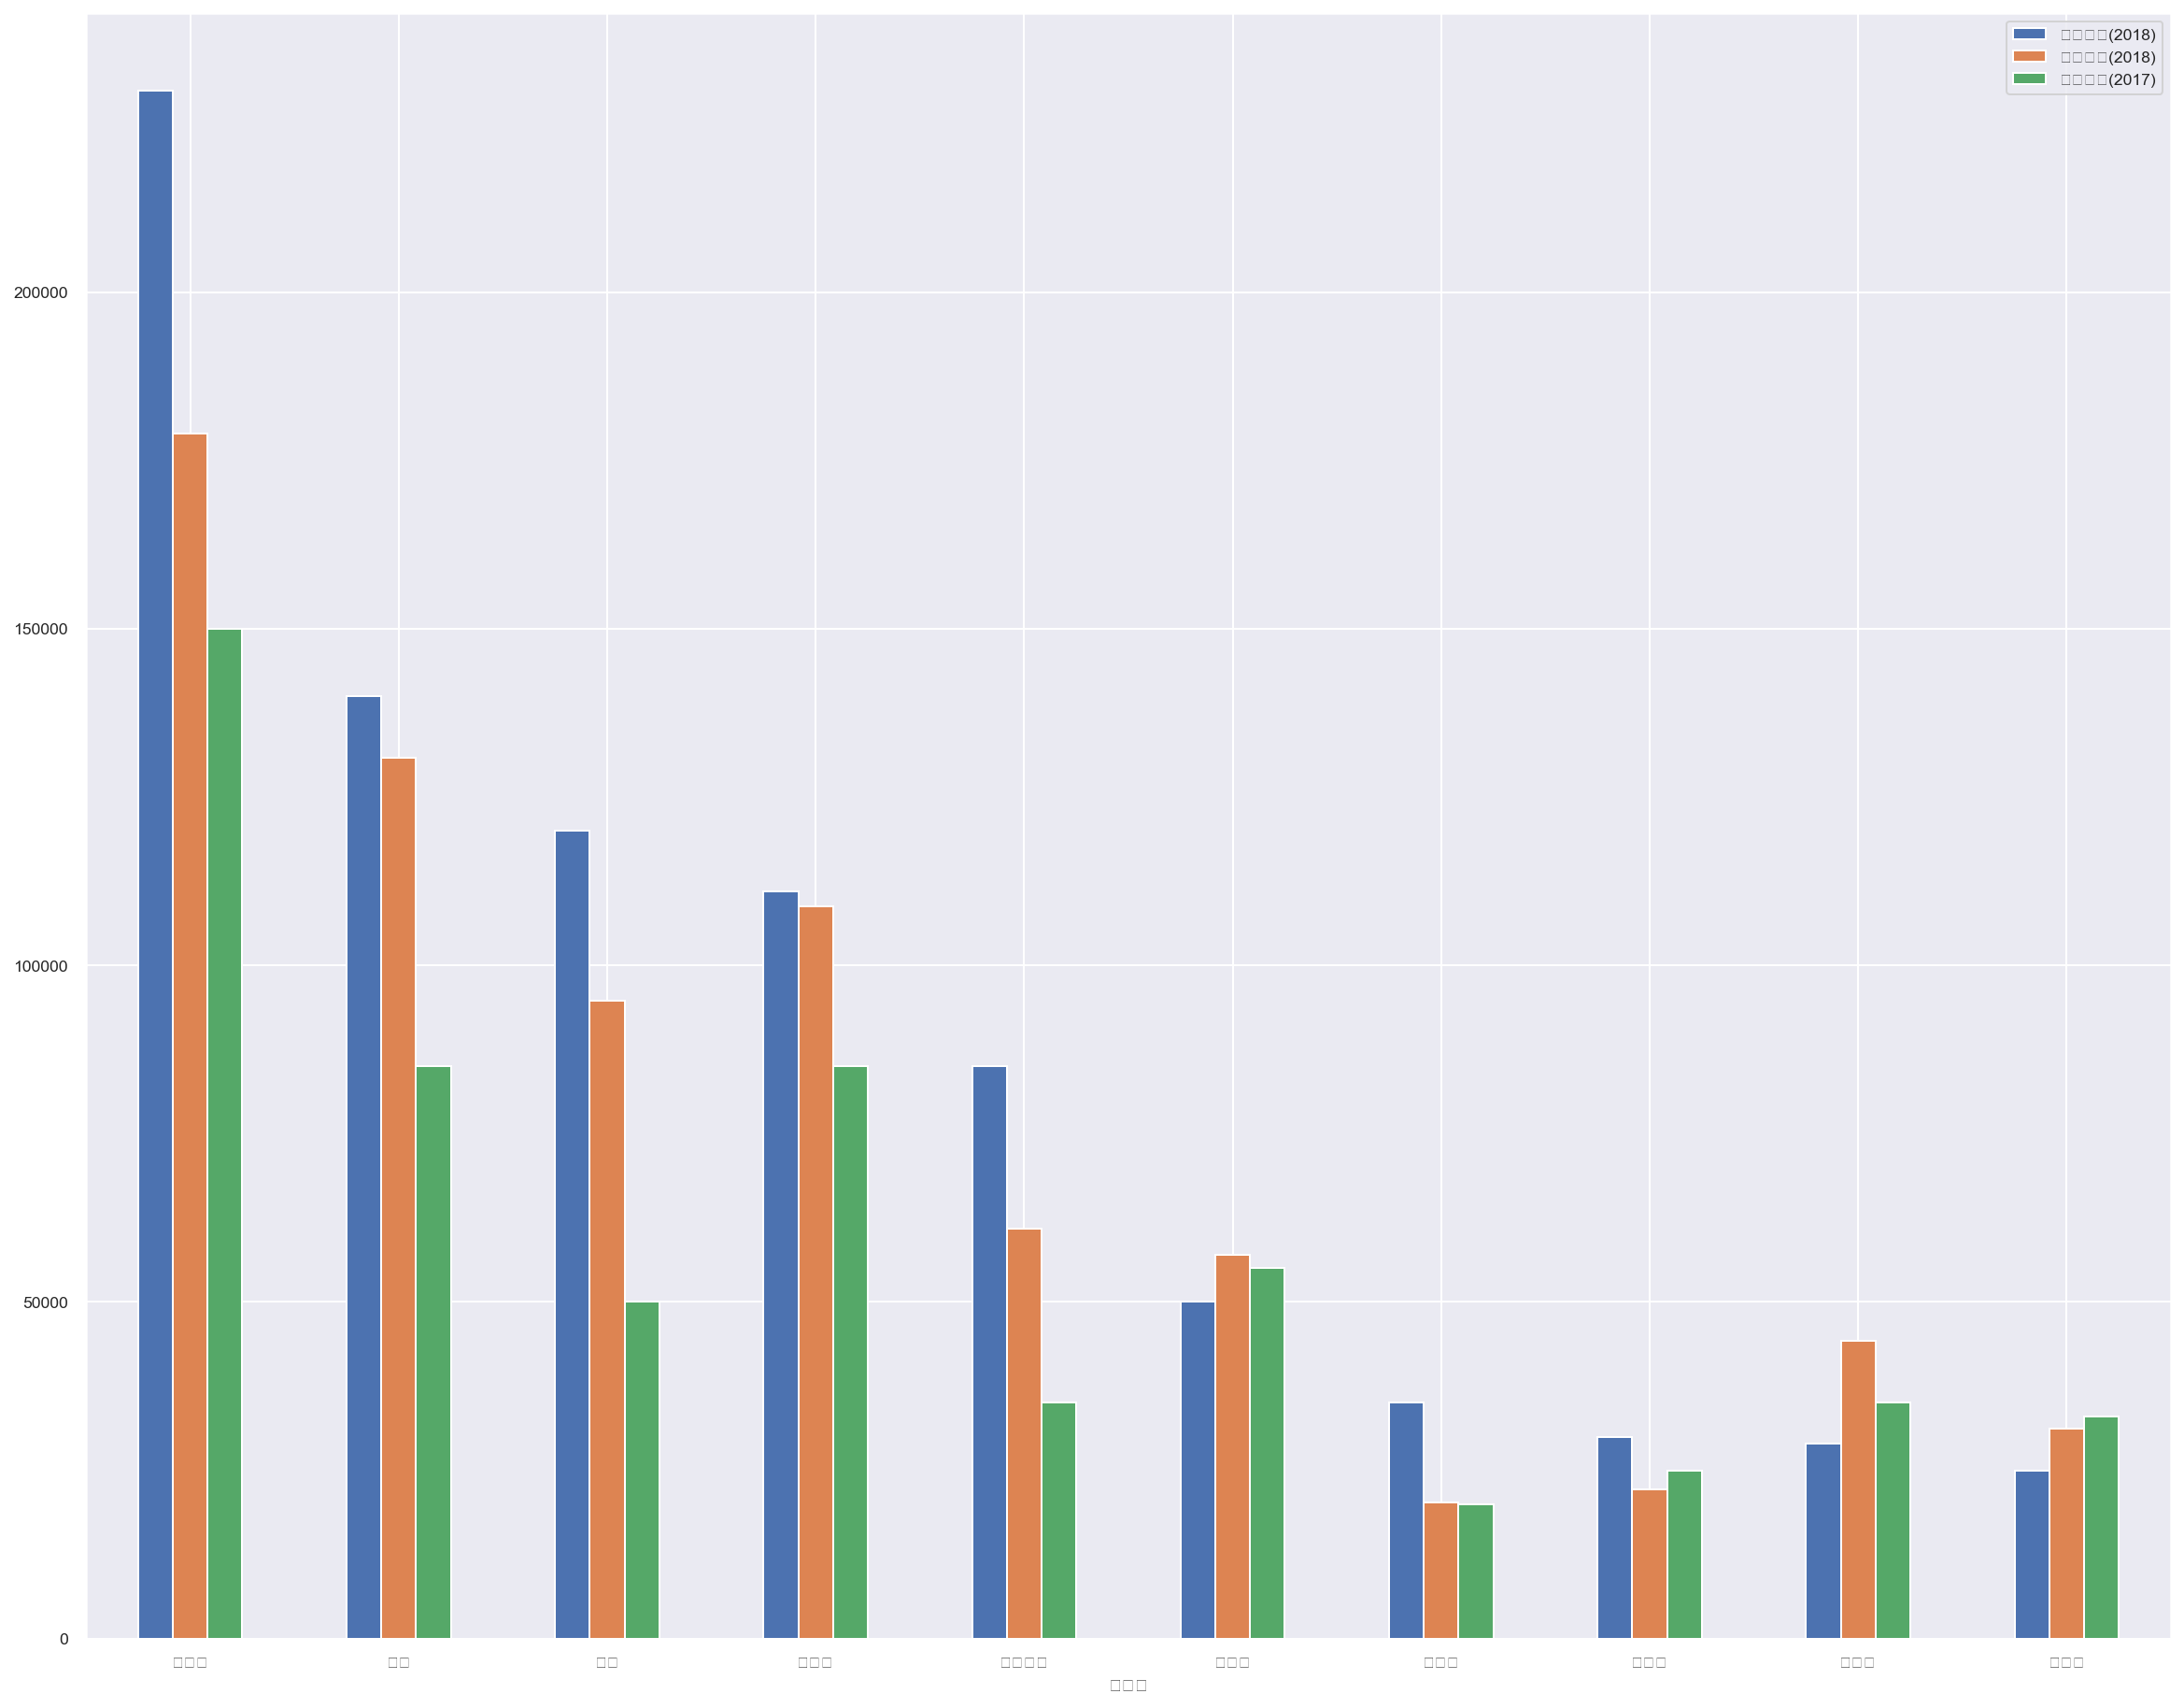

In [49]:
result_df.plot(x='선수명', 
               y=['실제연봉(2018)', '예측연봉(2018)', '작년연봉(2017)'], kind='bar', rot=0)

# 나 왜 초록색 안나오지